Regional Grain size model, SE USA and whole Australia combined

Dan Buscombe
PCMSC

In [440]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

from pingouin import partial_corr
import pingouin as pg
from sklearn.model_selection import RepeatedKFold, cross_val_score
import seaborn as sns
from sklearn import preprocessing
import geopandas as gpd
from geopandas.tools import sjoin

In [502]:
dfSEUS = pd.read_csv('../../../analysis/SEusa/model_data_out/ML_slope_wave_atlantic_2022-05-18_Data_Post2012_VerifiedOnshore_0.0015_right_transects_model_stratsample-by-lat.csv')

In [503]:
dfSEUS['code'] = np.ones(len(dfSEUS))

In [504]:
dfSEUS = dfSEUS[['latitude', 'longitude', 'd50',
        'beach_slope_average', 'mstr', 'code',
        'hs_max', 'hs_mean', 'dir', 'tp']].copy()

In [505]:
len(dfSEUS)

270

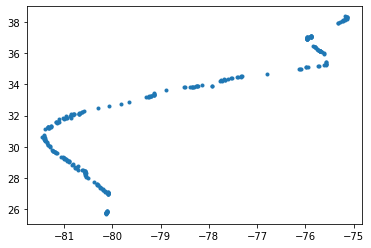

In [506]:
plt.plot(dfSEUS['longitude'], dfSEUS['latitude'],'.')

In [507]:
dataset = '../../../orig_data/australia/dataset_Australia_all.geojson'

dfOz = gpd.read_file(dataset)

dfOz = dfOz[dfOz['d50']<=1] #2] 
len(dfOz)

1226

In [508]:
ind = np.where(dfOz['quality_flag']!='Low')[0]
len(ind)
dfOz = dfOz.iloc[ind]
len(dfOz)

ind = np.where(dfOz['distance_to_sample']<1000)[0]
len(ind)
dfOz = dfOz.iloc[ind]
len(dfOz)


dfOz = dfOz.dropna()
# df.head()
len(dfOz)

809

In [509]:
regions = '../../../orig_data/australia/sediment_compartments/Regions.geojson'
Oz_regions = gpd.read_file(regions)

dfOzregions = sjoin(dfOz, Oz_regions, how='left')

C:\Users\dbuscombe\AppData\Local\Temp\8\ipykernel_4060\4179200646.py:4: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4283

  dfOzregions = sjoin(dfOz, Oz_regions, how='left')


In [510]:
dfOzNE = dfOzregions[dfOzregions['ID_Region']==1]
print(len(dfOzNE))

dfOzSE = dfOzregions[dfOzregions['ID_Region']==2]
print(len(dfOzSE))

dfOzS = dfOzregions[dfOzregions['ID_Region']==3]
print(len(dfOzS))

dfOzW = dfOzregions[dfOzregions['ID_Region']==4]
print(len(dfOzW))

dfOzNW = dfOzregions[dfOzregions['ID_Region']==5]
print(len(dfOzNW))

dfOzCG = dfOzregions[dfOzregions['ID_Region']==6] #Carpentaria Gulf
print(len(dfOzCG))

163
289
179
60
69
49


In [511]:
dfOzNE.rename(columns = {'Hs_max':'hs_max', 'Hs_mean':'hs_mean', 'Tp_mean': 'tp', 'Wdir_mean':'dir'}, inplace = True)
dfOzNE = dfOzNE[['latitude', 'longitude', 'd50',
        'beach_slope_average', 'mstr', 
        'hs_max', 'hs_mean', 'dir', 'tp']].copy()

dfOzSE.rename(columns = {'Hs_max':'hs_max', 'Hs_mean':'hs_mean', 'Tp_mean': 'tp', 'Wdir_mean':'dir'}, inplace = True)
dfOzSE = dfOzSE[['latitude', 'longitude', 'd50',
        'beach_slope_average', 'mstr', 
        'hs_max', 'hs_mean', 'dir', 'tp']].copy()

dfOzNW.rename(columns = {'Hs_max':'hs_max', 'Hs_mean':'hs_mean', 'Tp_mean': 'tp', 'Wdir_mean':'dir'}, inplace = True)
dfOzNW = dfOzNW[['latitude', 'longitude', 'd50',
        'beach_slope_average', 'mstr', 
        'hs_max', 'hs_mean', 'dir', 'tp']].copy()

dfOzS.rename(columns = {'Hs_max':'hs_max', 'Hs_mean':'hs_mean', 'Tp_mean': 'tp', 'Wdir_mean':'dir'}, inplace = True)
dfOzS = dfOzS[['latitude', 'longitude', 'd50',
        'beach_slope_average', 'mstr', 
        'hs_max', 'hs_mean', 'dir', 'tp']].copy()

dfOzW.rename(columns = {'Hs_max':'hs_max', 'Hs_mean':'hs_mean', 'Tp_mean': 'tp', 'Wdir_mean':'dir'}, inplace = True)
dfOzW = dfOzW[['latitude', 'longitude', 'd50',
        'beach_slope_average', 'mstr', 
        'hs_max', 'hs_mean', 'dir', 'tp']].copy()

dfOzCG.rename(columns = {'Hs_max':'hs_max', 'Hs_mean':'hs_mean', 'Tp_mean': 'tp', 'Wdir_mean':'dir'}, inplace = True)
dfOzCG = dfOzCG[['latitude', 'longitude', 'd50',
        'beach_slope_average', 'mstr', 
        'hs_max', 'hs_mean', 'dir', 'tp']].copy()

C:\Users\dbuscombe\AppData\Local\Temp\8\ipykernel_4060\2955628749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOzNE.rename(columns = {'Hs_max':'hs_max', 'Hs_mean':'hs_mean', 'Tp_mean': 'tp', 'Wdir_mean':'dir'}, inplace = True)
C:\Users\dbuscombe\AppData\Local\Temp\8\ipykernel_4060\2955628749.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOzSE.rename(columns = {'Hs_max':'hs_max', 'Hs_mean':'hs_mean', 'Tp_mean': 'tp', 'Wdir_mean':'dir'}, inplace = True)
C:\Users\dbuscombe\AppData\Local\Temp\8\ipykernel_4060\2955628749.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [512]:
XW = pg.pairwise_corr(dfOzW[['beach_slope_average','d50','mstr','tp','dir','hs_mean']].copy(), columns=['d50'], method='spearman', alternative='greater', padjust='bonf').round(3)
XS = pg.pairwise_corr(dfOzS[['beach_slope_average','d50','mstr','tp','dir','hs_mean']].copy(), columns=['d50'], method='spearman', alternative='greater', padjust='bonf').round(3)
XSE = pg.pairwise_corr(dfOzSE[['beach_slope_average','d50','mstr','tp','dir','hs_mean']].copy(), columns=['d50'], method='spearman', alternative='greater', padjust='bonf').round(3)

XNE = pg.pairwise_corr(dfOzNE[['beach_slope_average','d50','mstr','tp','dir','hs_mean']].copy(), columns=['d50'], method='spearman', alternative='greater', padjust='bonf').round(3)
XNW = pg.pairwise_corr(dfOzNW[['beach_slope_average','d50','mstr','tp','dir','hs_mean']].copy(), columns=['d50'], method='spearman', alternative='greater', padjust='bonf').round(3)
XCF = pg.pairwise_corr(dfOzCG[['beach_slope_average','d50','mstr','tp','dir','hs_mean']].copy(), columns=['d50'], method='spearman', alternative='greater', padjust='bonf').round(3)

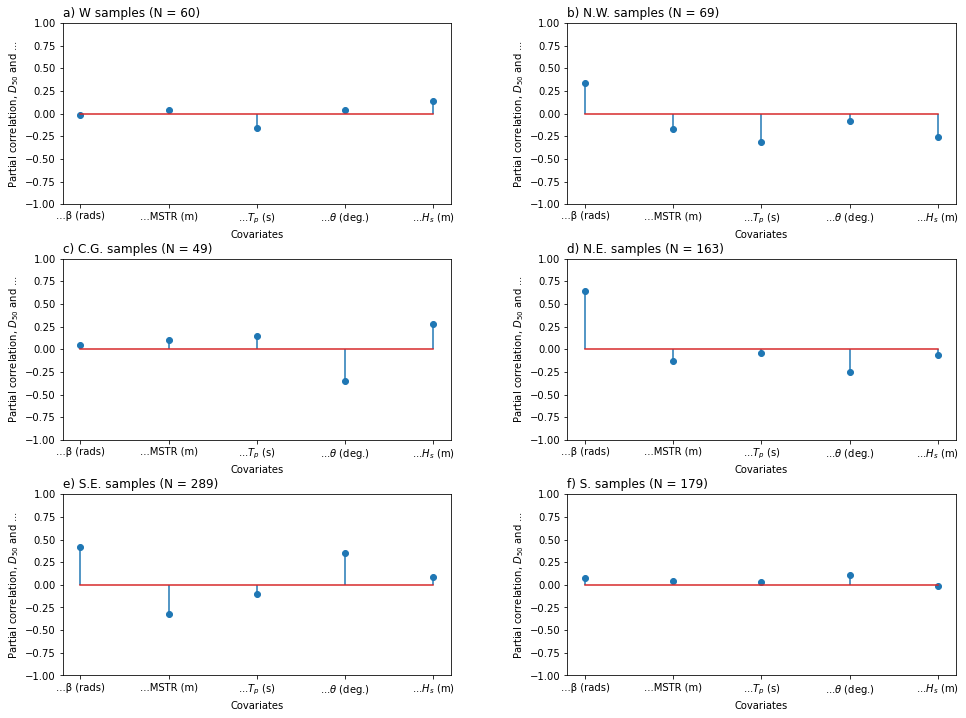

In [513]:
plt.figure(figsize=(16,12))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax = plt.subplot(321)
plt.stem(XW['r'])
plt.xticks([0,1,2,3,4])
ax.set_xticklabels(['...β (rads)','...MSTR (m)',r'...$T_p$ (s)',r'...$\theta$ (deg.)',r'...$H_s$ (m)'])
plt.ylim(-1,1)
plt.ylabel(r'Partial correlation, $D_{50}$ and ...')
plt.xlabel(r'Covariates')
plt.title(r"a) W samples (N = {})".format(len(dfOzW)), loc='left')

#######################
ax = plt.subplot(322)
plt.stem(XNW['r'])
plt.xticks([0,1,2,3,4])
ax.set_xticklabels(['...β (rads)','...MSTR (m)',r'...$T_p$ (s)',r'...$\theta$ (deg.)',r'...$H_s$ (m)'])
plt.ylim(-1,1)
plt.ylabel(r'Partial correlation, $D_{50}$ and ...')
plt.xlabel(r'Covariates')
plt.title(r"b) N.W. samples (N = {})".format(len(dfOzNW)), loc='left')

#######################
ax = plt.subplot(323)
plt.stem(XCF['r'])
plt.xticks([0,1,2,3,4])
ax.set_xticklabels(['...β (rads)','...MSTR (m)',r'...$T_p$ (s)',r'...$\theta$ (deg.)',r'...$H_s$ (m)'])
plt.ylim(-1,1)
plt.ylabel(r'Partial correlation, $D_{50}$ and ...')
plt.xlabel(r'Covariates')
plt.title(r"c) C.G. samples (N = {})".format(len(dfOzCG)), loc='left')

#######################
ax = plt.subplot(324)
plt.stem(XNE['r'])
plt.xticks([0,1,2,3,4])
ax.set_xticklabels(['...β (rads)','...MSTR (m)',r'...$T_p$ (s)',r'...$\theta$ (deg.)',r'...$H_s$ (m)'])
plt.ylim(-1,1)
plt.ylabel(r'Partial correlation, $D_{50}$ and ...')
plt.xlabel(r'Covariates')
plt.title(r"d) N.E. samples (N = {})".format(len(dfOzNE)), loc='left')

#######################
ax = plt.subplot(325)
plt.stem(XSE['r'])
plt.xticks([0,1,2,3,4])
ax.set_xticklabels(['...β (rads)','...MSTR (m)',r'...$T_p$ (s)',r'...$\theta$ (deg.)',r'...$H_s$ (m)'])
plt.ylim(-1,1)
plt.ylabel(r'Partial correlation, $D_{50}$ and ...')
plt.xlabel(r'Covariates')
plt.title(r"e) S.E. samples (N = {})".format(len(dfOzSE)), loc='left')

#######################
ax = plt.subplot(326)
plt.stem(XS['r'])
plt.xticks([0,1,2,3,4])
ax.set_xticklabels(['...β (rads)','...MSTR (m)',r'...$T_p$ (s)',r'...$\theta$ (deg.)',r'...$H_s$ (m)'])
plt.ylim(-1,1)
plt.ylabel(r'Partial correlation, $D_{50}$ and ...')
plt.xlabel(r'Covariates')
plt.title(r"f) S. samples (N = {})".format(len(dfOzS)), loc='left')

plt.savefig('../data_plots/wholeAus_regions_partialcorrel.jpg', dpi=300, bbox_inches='tight')

In [514]:
def mcfall(X,hs):
    if hs<=1:
        A = 3.1; n = -1.1 
    elif hs>=3:
        A = 3.9; n = -1.85         
    else:
        A = 2.1; n = -1.8             
    return (X/A)**(1/n)

def bujan(B,a,b,c):
    t1=(B-c)
    return (1/8)*(8*((t1/a))**(1/b)+1)

def prc_err(y,yest):
    return 100*(np.abs(y-yest)/y)


a = -0.154
b = -0.145
c = 0.268

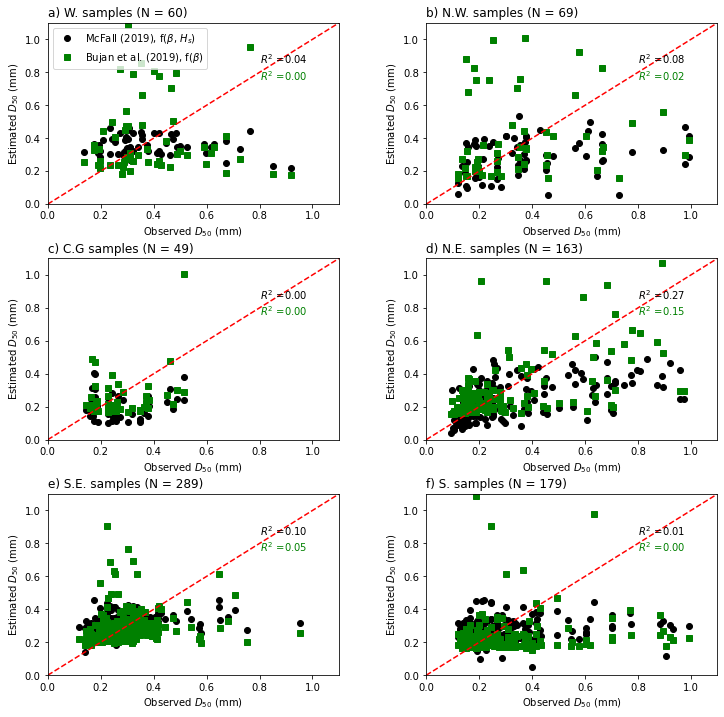

In [515]:
plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(321)

ds_est_baseline = np.array([mcfall(X,hs) for X,hs in zip(1/dfOzW['beach_slope_average'],dfOzW['hs_mean'])])
ds_est_baseline2 = np.array([bujan(B,a,b,c) for B in dfOzW['beach_slope_average']])

plt.plot(dfOzW['d50'], ds_est_baseline,'ko', label=r"McFall (2019), f($\beta$, $H_s$)")
plt.plot(dfOzW['d50'], ds_est_baseline2,'gs', label=r"Bujan et al. (2019), f($\beta$)")
plt.xlim(0,1.1); plt.ylim(0,1.1)
xl=plt.xlim()
plt.plot(xl,xl,'r--')
plt.title(r"a) W. samples (N = {})".format(len(dfOzW)), loc='left')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.legend(loc="upper left")

r2 = np.min(np.corrcoef(dfOzW['d50'], ds_est_baseline))**2
plt.text(.8,.85,r'$R^2$ ='+str(r2)[:4], color='k')
r2 = np.min(np.corrcoef(dfOzW['d50'], ds_est_baseline2))**2
plt.text(.8,.75,r'$R^2$ ='+str(r2)[:4], color='g')

plt.subplot(322)
ds_est_baseline = np.array([mcfall(X,hs) for X,hs in zip(1/dfOzNW['beach_slope_average'],dfOzNW['hs_mean'])])
ds_est_baseline2 = np.array([bujan(B,a,b,c) for B in dfOzNW['beach_slope_average']])

plt.plot(dfOzNW['d50'], ds_est_baseline,'ko')
plt.plot(dfOzNW['d50'], ds_est_baseline2,'gs')
plt.xlim(0,1.1); plt.ylim(0,1.1)
xl=plt.xlim()
plt.plot(xl,xl,'r--')
plt.title(r"b) N.W. samples (N = {})".format(len(dfOzNW)), loc='left')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')

r2 = np.min(np.corrcoef(dfOzNW['d50'], ds_est_baseline))**2
plt.text(.8,.85,r'$R^2$ ='+str(r2)[:4], color='k')
r2 = np.min(np.corrcoef(dfOzNW['d50'], ds_est_baseline2))**2
plt.text(.8,.75,r'$R^2$ ='+str(r2)[:4], color='g')

plt.subplot(323)
ds_est_baseline = np.array([mcfall(X,hs) for X,hs in zip(1/dfOzCG['beach_slope_average'],dfOzCG['hs_mean'])])
ds_est_baseline2 = np.array([bujan(B,a,b,c) for B in dfOzCG['beach_slope_average']])

plt.plot(dfOzCG['d50'], ds_est_baseline,'ko')
plt.plot(dfOzCG['d50'], ds_est_baseline2,'gs')
plt.xlim(0,1.1); plt.ylim(0,1.1)
xl=plt.xlim()
plt.plot(xl,xl,'r--')
plt.title(r"c) C.G samples (N = {})".format(len(dfOzCG)), loc='left')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')

r2 = np.min(np.corrcoef(dfOzCG['d50'], ds_est_baseline))**2
plt.text(.8,.85,r'$R^2$ ='+str(r2)[:4], color='k')
r2 = np.min(np.corrcoef(dfOzCG['d50'], ds_est_baseline2))**2
plt.text(.8,.75,r'$R^2$ ='+str(r2)[:4], color='g')

plt.subplot(324)
ds_est_baseline = np.array([mcfall(X,hs) for X,hs in zip(1/dfOzNE['beach_slope_average'],dfOzNE['hs_mean'])])
ds_est_baseline2 = np.array([bujan(B,a,b,c) for B in dfOzNE['beach_slope_average']])

plt.plot(dfOzNE['d50'], ds_est_baseline,'ko')
plt.plot(dfOzNE['d50'], ds_est_baseline2,'gs')
plt.xlim(0,1.1); plt.ylim(0,1.1)
xl=plt.xlim()
plt.plot(xl,xl,'r--')
plt.title(r"d) N.E. samples (N = {})".format(len(dfOzNE)), loc='left')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')

r2 = np.min(np.corrcoef(dfOzNE['d50'], ds_est_baseline))**2
plt.text(.8,.85,r'$R^2$ ='+str(r2)[:4], color='k')
r2 = np.min(np.corrcoef(dfOzNE['d50'], ds_est_baseline2))**2
plt.text(.8,.75,r'$R^2$ ='+str(r2)[:4], color='g')

plt.subplot(325)
ds_est_baseline = np.array([mcfall(X,hs) for X,hs in zip(1/dfOzSE['beach_slope_average'],dfOzSE['hs_mean'])])
ds_est_baseline2 = np.array([bujan(B,a,b,c) for B in dfOzSE['beach_slope_average']])

plt.plot(dfOzSE['d50'], ds_est_baseline,'ko')
plt.plot(dfOzSE['d50'], ds_est_baseline2,'gs')
plt.xlim(0,1.1); plt.ylim(0,1.1)
xl=plt.xlim()
plt.plot(xl,xl,'r--')
plt.title(r"e) S.E. samples (N = {})".format(len(dfOzSE)), loc='left')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')

r2 = np.min(np.corrcoef(dfOzSE['d50'], ds_est_baseline))**2
plt.text(.8,.85,r'$R^2$ ='+str(r2)[:4], color='k')
r2 = np.min(np.corrcoef(dfOzSE['d50'], ds_est_baseline2))**2
plt.text(.8,.75,r'$R^2$ ='+str(r2)[:4], color='g')

plt.subplot(326)
ds_est_baseline = np.array([mcfall(X,hs) for X,hs in zip(1/dfOzS['beach_slope_average'],dfOzS['hs_mean'])])
ds_est_baseline2 = np.array([bujan(B,a,b,c) for B in dfOzS['beach_slope_average']])

plt.plot(dfOzS['d50'], ds_est_baseline,'ko')
plt.plot(dfOzS['d50'], ds_est_baseline2,'gs')
plt.xlim(0,1.1); plt.ylim(0,1.1)
xl=plt.xlim()
plt.plot(xl,xl,'r--')
plt.title(r"f) S. samples (N = {})".format(len(dfOzS)), loc='left')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')

r2 = np.min(np.corrcoef(dfOzS['d50'], ds_est_baseline))**2
plt.text(.8,.85,r'$R^2$ ='+str(r2)[:4], color='k')
r2 = np.min(np.corrcoef(dfOzS['d50'], ds_est_baseline2))**2
plt.text(.8,.75,r'$R^2$ ='+str(r2)[:4], color='g')

plt.savefig('../data_plots/wholeAus_regions_baselines.jpg', dpi=300, bbox_inches='tight')

In [551]:
# params = {
#     "n_estimators": 500,
#     "max_depth": 4,
#     "min_samples_split": 5,
#     "learning_rate": 0.01,
#     "loss": "squared_error",
# }

# test_size = 0.75


# params = {
#     "n_estimators": 500,
#     "max_depth": 8,
#     "min_samples_split": 5,
#     "learning_rate": 0.01,
#     "loss": "squared_error",
# }

# test_size = 0.75



In [596]:
# ensemble.GradientBoostingRegressor?

The mean squared error (MSE) on test set: 0.0437
The mean squared error (MSE) on test set: 0.0747
The mean squared error (MSE) on test set: 0.0174
The mean squared error (MSE) on test set: 0.0342
The mean squared error (MSE) on test set: 0.0168
The mean squared error (MSE) on test set: 0.0470


Text(0.57, 0.05, '43%')

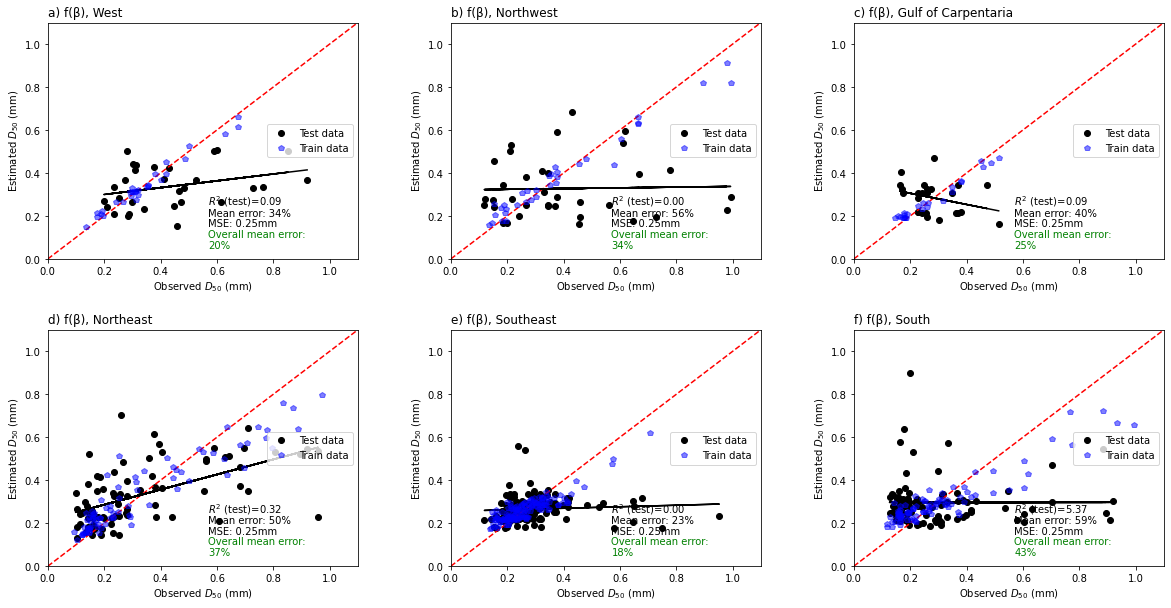

In [631]:

# params = {
#     "n_estimators": 500,
#     "max_depth": 5,
#     "min_samples_split": 5,
#     "learning_rate": 0.01,
#     "loss": "squared_error",
#     "subsample": 1.0
# }

# test_size = 0.5



params = {
    "n_estimators": 500,
    "max_depth": 3,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
    "subsample": 1.0
}

test_size = 0.5


plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

##################
rand = np.random.randn(len(dfOzW))

feature_names1 = ['β (radians)', 'Random\n (non-dim.)']
X = np.stack((dfOzW['beach_slope_average'], rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzW['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(231)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"a) f(β), West", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzNW))

feature_names1 = ['β (radians)', 'Random\n (non-dim.)']
X = np.stack((dfOzNW['beach_slope_average'], rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzNW['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(232)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"b) f(β), Northwest", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzCG))

feature_names1 = ['β (radians)', 'Random\n (non-dim.)']
X = np.stack((dfOzCG['beach_slope_average'], rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzCG['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(233)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"c) f(β), Gulf of Carpentaria", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzNE))

feature_names1 = ['β (radians)', 'Random\n (non-dim.)']
X = np.stack((dfOzNE['beach_slope_average'], rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzNE['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(234)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"d) f(β), Northeast", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzSE))

feature_names1 = ['β (radians)', 'Random\n (non-dim.)']
X = np.stack((dfOzSE['beach_slope_average'], rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzSE['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(235)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"e) f(β), Southeast", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzS))

feature_names1 = ['β (radians)', 'Random\n (non-dim.)']
X = np.stack((dfOzS['beach_slope_average'], rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzS['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(236)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"f) f(β), South", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')



The mean squared error (MSE) on test set: 0.0356
The mean squared error (MSE) on test set: 0.0713
The mean squared error (MSE) on test set: 0.0078
The mean squared error (MSE) on test set: 0.0532
The mean squared error (MSE) on test set: 0.0151
The mean squared error (MSE) on test set: 0.0345


Text(0.57, 0.05, '35%')

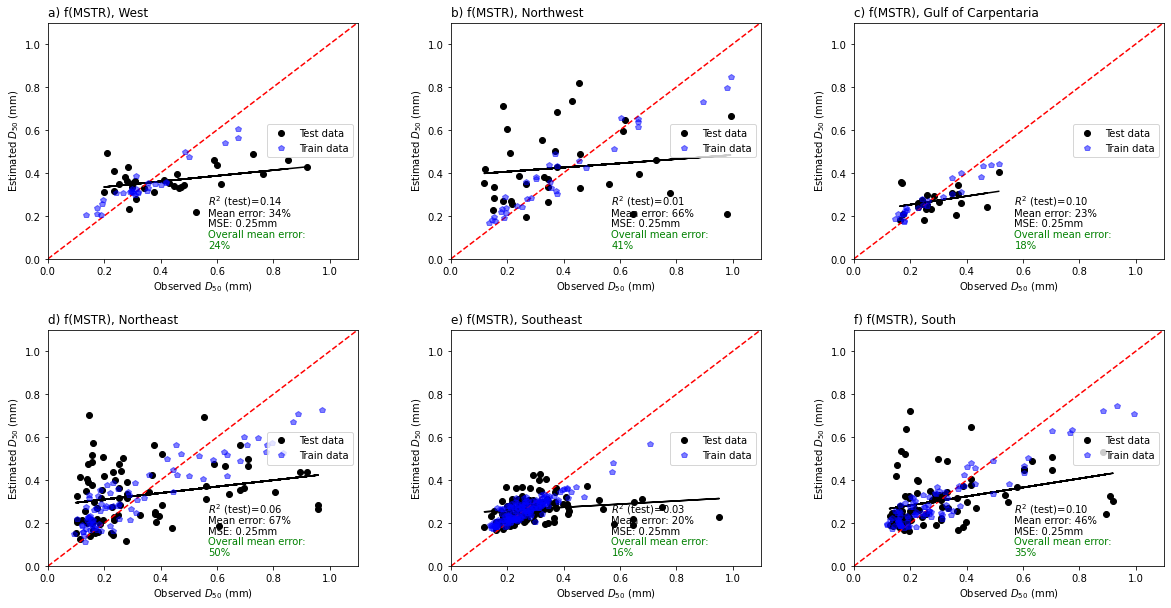

In [632]:



# params = {
#     "n_estimators": 500,
#     "max_depth": 3,
#     "min_samples_split": 5,
#     "learning_rate": 0.01,
#     "loss": "squared_error",
#     "subsample": 1.0
# }

# test_size = 0.5


params = {
    "n_estimators": 500,
    "max_depth": 3,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
    "subsample": .5
}

test_size = 0.5

plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

##################
rand = np.random.randn(len(dfOzW))

feature_names1 = [r'MSTR (m)', 'Random\n (non-dim.)']
X = np.stack((dfOzW['mstr'], rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzW['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(231)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"a) f(MSTR), West", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzNW))

feature_names1 = [r'MSTR (m)', 'Random\n (non-dim.)']
X = np.stack((dfOzNW['mstr'], rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzNW['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(232)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"b) f(MSTR), Northwest", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzCG))

feature_names1 = [r'MSTR (m)', 'Random\n (non-dim.)']
X = np.stack((dfOzCG['mstr'], rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzCG['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(233)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"c) f(MSTR), Gulf of Carpentaria", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzNE))

feature_names1 = [r'MSTR (m)', 'Random\n (non-dim.)']
X = np.stack((dfOzNE['mstr'], rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzNE['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(234)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"d) f(MSTR), Northeast", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzSE))

feature_names1 = [r'MSTR (m)', 'Random\n (non-dim.)']
X = np.stack((dfOzSE['mstr'], rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzSE['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(235)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"e) f(MSTR), Southeast", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzS))

feature_names1 = [r'MSTR (m)', 'Random\n (non-dim.)']
X = np.stack((dfOzS['mstr'], rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzS['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(236)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"f) f(MSTR), South", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')



The mean squared error (MSE) on test set: 0.0373
The mean squared error (MSE) on test set: 0.0599
The mean squared error (MSE) on test set: 0.0082
The mean squared error (MSE) on test set: 0.0308
The mean squared error (MSE) on test set: 0.0140
The mean squared error (MSE) on test set: 0.0325


Text(0.57, 0.05, '35%')

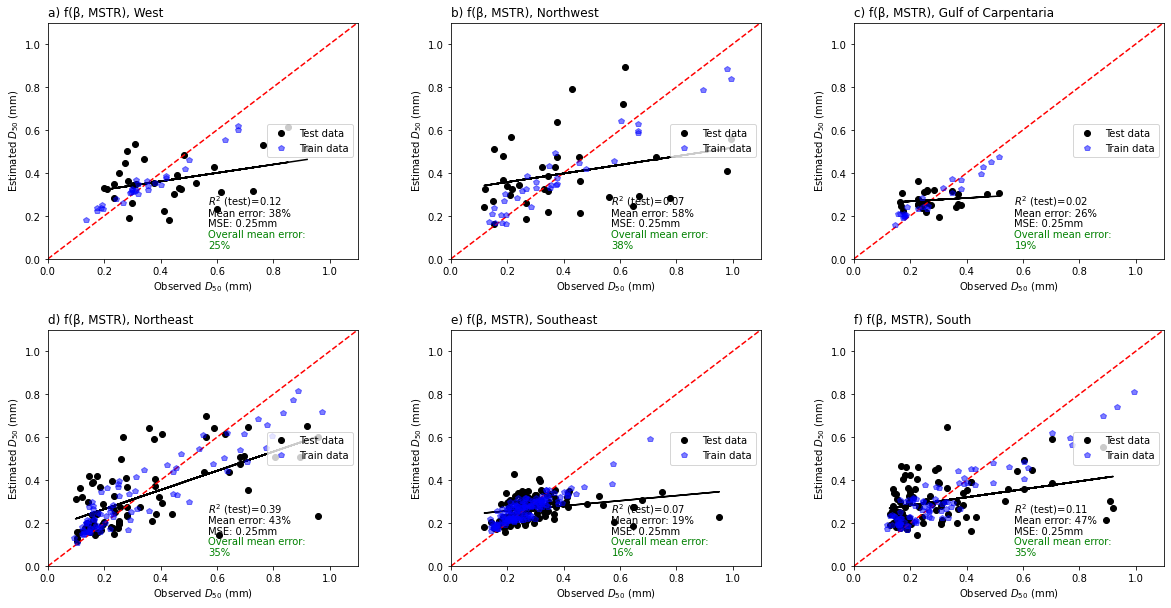

In [633]:

# params = {
#     "n_estimators": 500,
#     "max_depth": 3,
#     "min_samples_split": 5,
#     "learning_rate": 0.01,
#     "loss": "squared_error",
#     "subsample": 1.0
# }

# test_size = 0.5


params = {
    "n_estimators": 500,
    "max_depth": 3,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
    "subsample": .5
}

test_size = 0.5


plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

##################
rand = np.random.randn(len(dfOzW))

feature_names1 = ['β (radians)','MSTR (m)', 'Random\n (non-dim.)']
X = np.stack((dfOzW['beach_slope_average'], dfOzW['mstr'], rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzW['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(231)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"a) f(β, MSTR), West", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzNW))

feature_names1 = ['β (radians)','MSTR (m)', 'Random\n (non-dim.)']
X = np.stack((dfOzNW['beach_slope_average'], dfOzNW['mstr'], rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzNW['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(232)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"b) f(β, MSTR), Northwest", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzCG))

feature_names1 = ['β (radians)','MSTR (m)', 'Random\n (non-dim.)']
X = np.stack((dfOzCG['beach_slope_average'], dfOzCG['mstr'], rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzCG['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(233)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"c) f(β, MSTR), Gulf of Carpentaria", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzNE))

feature_names1 = ['β (radians)','MSTR (m)', 'Random\n (non-dim.)']
X = np.stack((dfOzNE['beach_slope_average'], dfOzNE['mstr'], rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzNE['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(234)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"d) f(β, MSTR), Northeast", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzSE))

feature_names1 = ['β (radians)','MSTR (m)', 'Random\n (non-dim.)']
X = np.stack((dfOzSE['beach_slope_average'], dfOzSE['mstr'], rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzSE['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(235)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"e) f(β, MSTR), Southeast", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzS))

feature_names1 = ['β (radians)','MSTR (m)', 'Random\n (non-dim.)']
X = np.stack((dfOzS['beach_slope_average'], dfOzS['mstr'], rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzS['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(236)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"f) f(β, MSTR), South", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')



The mean squared error (MSE) on test set: 0.0314
The mean squared error (MSE) on test set: 0.0605
The mean squared error (MSE) on test set: 0.0075
The mean squared error (MSE) on test set: 0.0331
The mean squared error (MSE) on test set: 0.0143
The mean squared error (MSE) on test set: 0.0307


Text(0.57, 0.05, '34%')

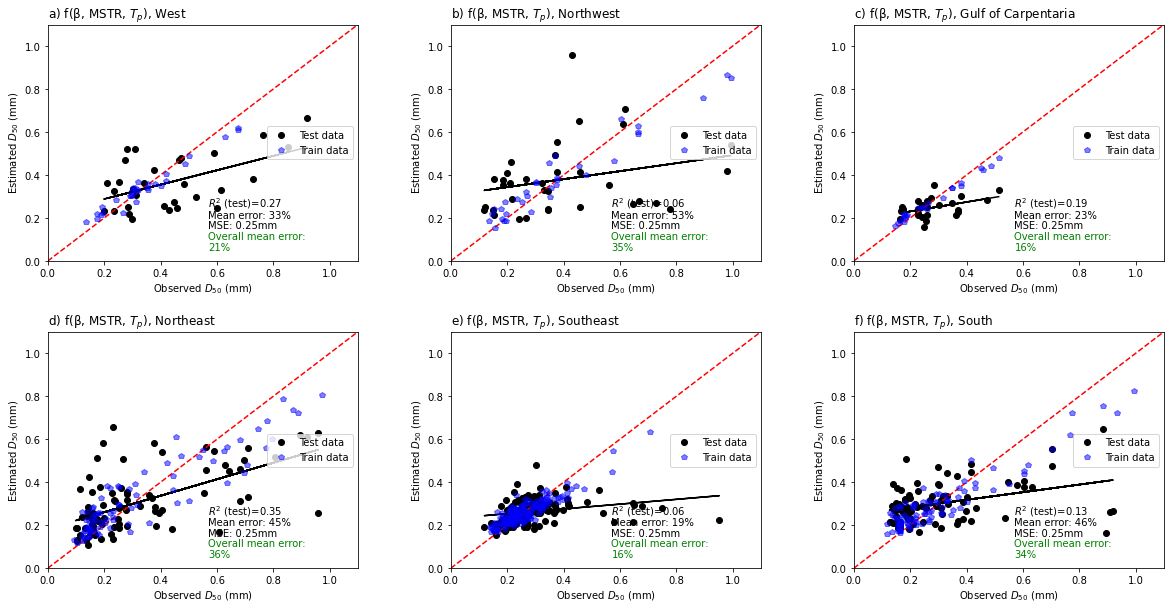

In [634]:

# params = {
#     "n_estimators": 500,
#     "max_depth": 3,
#     "min_samples_split": 5,
#     "learning_rate": 0.01,
#     "loss": "squared_error",
#     "subsample": 1.0
# }

# test_size = 0.5


params = {
    "n_estimators": 500,
    "max_depth": 3,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
    "subsample": .5
}

test_size = 0.5


plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

##################
rand = np.random.randn(len(dfOzW))

feature_names1 = ['β (radians)','MSTR (m)',r'$T_p$ (s)', 'Random\n (non-dim.)']
X = np.stack((dfOzW['beach_slope_average'], dfOzW['mstr'], dfOzW['tp'],rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzW['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(231)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"a) f(β, MSTR, $T_p$), West", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzNW))

feature_names1 = ['β (radians)','MSTR (m)',r'$T_p$ (s)', 'Random\n (non-dim.)']
X = np.stack((dfOzNW['beach_slope_average'], dfOzNW['mstr'], dfOzNW['tp'],rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzNW['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(232)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"b) f(β, MSTR, $T_p$), Northwest", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzCG))

feature_names1 = ['β (radians)','MSTR (m)',r'$T_p$ (s)', 'Random\n (non-dim.)']
X = np.stack((dfOzCG['beach_slope_average'], dfOzCG['mstr'], dfOzCG['tp'],rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzCG['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(233)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"c) f(β, MSTR, $T_p$), Gulf of Carpentaria", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzNE))

feature_names1 = ['β (radians)','MSTR (m)',r'$T_p$ (s)', 'Random\n (non-dim.)']
X = np.stack((dfOzNE['beach_slope_average'], dfOzNE['mstr'], dfOzNE['tp'],rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzNE['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(234)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"d) f(β, MSTR, $T_p$), Northeast", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzSE))

feature_names1 = ['β (radians)','MSTR (m)',r'$T_p$ (s)', 'Random\n (non-dim.)']
X = np.stack((dfOzSE['beach_slope_average'], dfOzSE['mstr'], dfOzSE['tp'],rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzSE['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(235)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"e) f(β, MSTR, $T_p$), Southeast", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzS))

feature_names1 = ['β (radians)','MSTR (m)',r'$T_p$ (s)', 'Random\n (non-dim.)']
X = np.stack((dfOzS['beach_slope_average'], dfOzS['mstr'], dfOzS['tp'],rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzS['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(236)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"f) f(β, MSTR, $T_p$), South", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')



The mean squared error (MSE) on test set: 0.0348
The mean squared error (MSE) on test set: 0.0657
The mean squared error (MSE) on test set: 0.0106
The mean squared error (MSE) on test set: 0.0353
The mean squared error (MSE) on test set: 0.0146
The mean squared error (MSE) on test set: 0.0358


Text(0.57, 0.05, '37%')

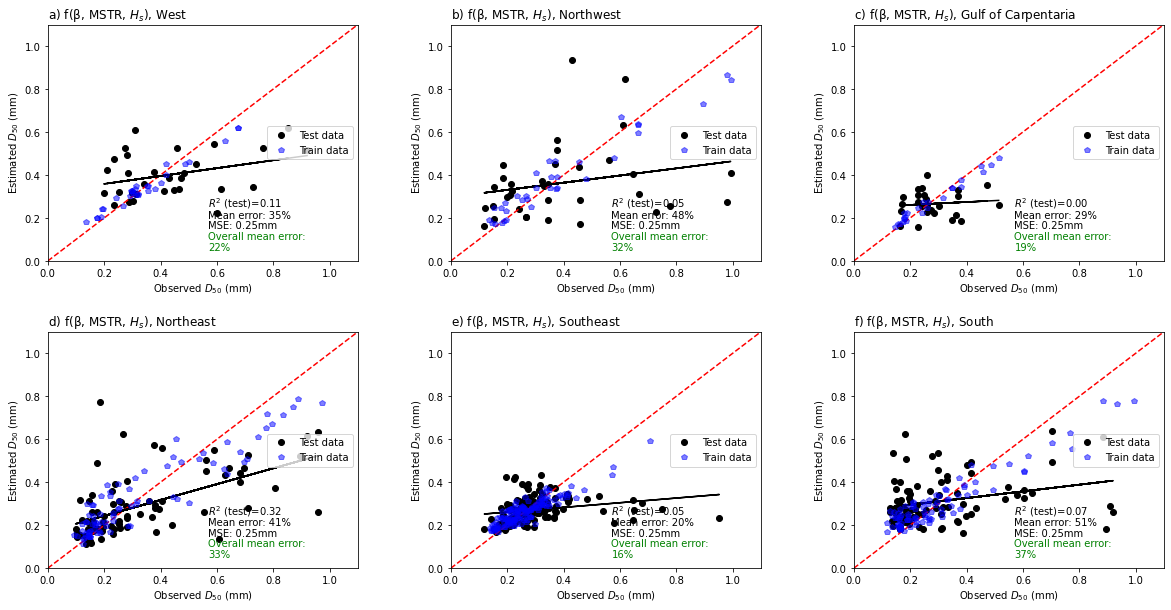

In [635]:

# params = {
#     "n_estimators": 500,
#     "max_depth": 3,
#     "min_samples_split": 5,
#     "learning_rate": 0.01,
#     "loss": "squared_error",
#     "subsample": 1.0
# }

# test_size = 0.5


params = {
    "n_estimators": 500,
    "max_depth": 3,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
    "subsample": .5
}

test_size = 0.5


plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

##################
rand = np.random.randn(len(dfOzW))

feature_names1 = ['β (radians)','MSTR (m)',r'$H_s$ (m)', 'Random\n (non-dim.)']
X = np.stack((dfOzW['beach_slope_average'], dfOzW['mstr'], dfOzW['hs_mean'],rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzW['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(231)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"a) f(β, MSTR, $H_s$), West", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzNW))

feature_names1 = ['β (radians)','MSTR (m)',r'$H_s$ (m)', 'Random\n (non-dim.)']
X = np.stack((dfOzNW['beach_slope_average'], dfOzNW['mstr'], dfOzNW['hs_mean'],rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzNW['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(232)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"b) f(β, MSTR, $H_s$), Northwest", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzCG))

feature_names1 = ['β (radians)','MSTR (m)',r'$H_s$ (m)', 'Random\n (non-dim.)']
X = np.stack((dfOzCG['beach_slope_average'], dfOzCG['mstr'], dfOzCG['hs_mean'],rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzCG['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(233)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"c) f(β, MSTR, $H_s$), Gulf of Carpentaria", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzNE))

feature_names1 = ['β (radians)','MSTR (m)',r'$H_s$ (m)', 'Random\n (non-dim.)']
X = np.stack((dfOzNE['beach_slope_average'], dfOzNE['mstr'], dfOzNE['hs_mean'],rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzNE['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(234)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"d) f(β, MSTR, $H_s$), Northeast", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzSE))

feature_names1 = ['β (radians)','MSTR (m)',r'$H_s$ (m)', 'Random\n (non-dim.)']
X = np.stack((dfOzSE['beach_slope_average'], dfOzSE['mstr'], dfOzSE['hs_mean'],rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzSE['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(235)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"e) f(β, MSTR, $H_s$), Southeast", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzS))

feature_names1 = ['β (radians)','MSTR (m)',r'$H_s$ (m)', 'Random\n (non-dim.)']
X = np.stack((dfOzS['beach_slope_average'], dfOzS['mstr'], dfOzS['hs_mean'],rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzS['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(236)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"f) f(β, MSTR, $H_s$), South", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')



The mean squared error (MSE) on test set: 0.0342
The mean squared error (MSE) on test set: 0.0599
The mean squared error (MSE) on test set: 0.0088
The mean squared error (MSE) on test set: 0.0284
The mean squared error (MSE) on test set: 0.0143
The mean squared error (MSE) on test set: 0.0349


Text(0.57, 0.05, '35%')

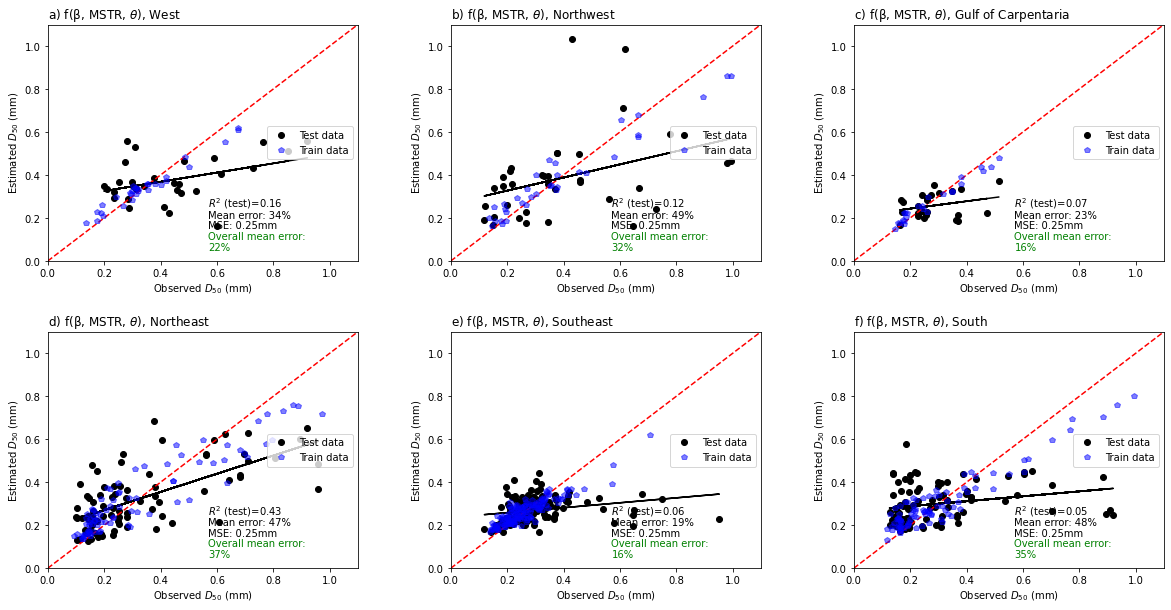

In [636]:

# params = {
#     "n_estimators": 500,
#     "max_depth": 3,
#     "min_samples_split": 5,
#     "learning_rate": 0.01,
#     "loss": "squared_error",
#     "subsample": 1.0
# }

# test_size = 0.5


params = {
    "n_estimators": 500,
    "max_depth": 3,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
    "subsample": .5
}

test_size = 0.5


plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

##################
rand = np.random.randn(len(dfOzW))

feature_names1 = ['β (radians)','MSTR (m)',r'$\theta$ (deg.)', 'Random\n (non-dim.)']
X = np.stack((dfOzW['beach_slope_average'], dfOzW['mstr'], dfOzW['dir'],rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzW['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(231)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"a) f(β, MSTR, $\theta$), West", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzNW))

feature_names1 = ['β (radians)','MSTR (m)',r'$\theta$ (deg.)', 'Random\n (non-dim.)']
X = np.stack((dfOzNW['beach_slope_average'], dfOzNW['mstr'], dfOzNW['dir'],rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzNW['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(232)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"b) f(β, MSTR, $\theta$), Northwest", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzCG))

feature_names1 = ['β (radians)','MSTR (m)',r'$\theta$ (deg.)', 'Random\n (non-dim.)']
X = np.stack((dfOzCG['beach_slope_average'], dfOzCG['mstr'], dfOzCG['dir'],rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzCG['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(233)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"c) f(β, MSTR, $\theta$), Gulf of Carpentaria", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzNE))

feature_names1 = ['β (radians)','MSTR (m)',r'$\theta$ (deg.)', 'Random\n (non-dim.)']
X = np.stack((dfOzNE['beach_slope_average'], dfOzNE['mstr'], dfOzNE['dir'],rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzNE['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(234)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"d) f(β, MSTR, $\theta$), Northeast", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzSE))

feature_names1 = ['β (radians)','MSTR (m)',r'$\theta$ (deg.)', 'Random\n (non-dim.)']
X = np.stack((dfOzSE['beach_slope_average'], dfOzSE['mstr'], dfOzSE['dir'],rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzSE['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(235)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"e) f(β, MSTR, $\theta$), Southeast", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzS))

feature_names1 = ['β (radians)','MSTR (m)',r'$\theta$ (deg.)', 'Random\n (non-dim.)']
X = np.stack((dfOzS['beach_slope_average'], dfOzS['mstr'], dfOzS['dir'],rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzS['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(236)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"f) f(β, MSTR, $\theta$), South", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')



The mean squared error (MSE) on test set: 0.0328
The mean squared error (MSE) on test set: 0.0709
The mean squared error (MSE) on test set: 0.0062
The mean squared error (MSE) on test set: 0.0550
The mean squared error (MSE) on test set: 0.0149
The mean squared error (MSE) on test set: 0.0334


Text(0.57, 0.05, '36%')

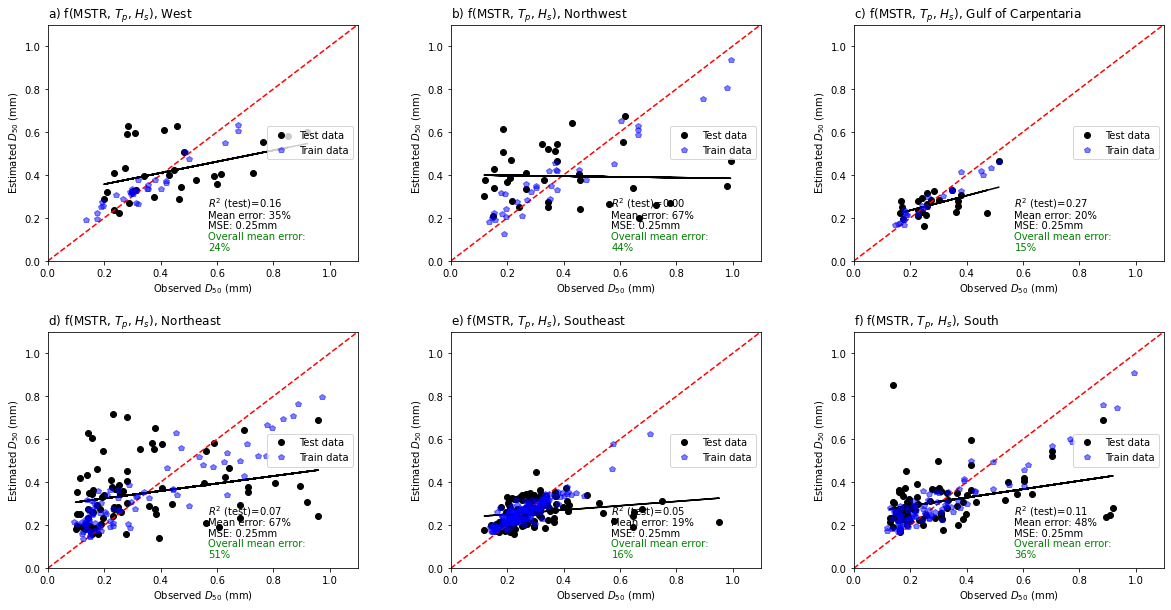

In [637]:

# params = {
#     "n_estimators": 500,
#     "max_depth": 3,
#     "min_samples_split": 5,
#     "learning_rate": 0.01,
#     "loss": "squared_error",
#     "subsample": 1.0
# }

# test_size = 0.5


params = {
    "n_estimators": 500,
    "max_depth": 3,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
    "subsample": .5
}

test_size = 0.5


plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

##################
rand = np.random.randn(len(dfOzW))

feature_names1 = ['MSTR (m)',r'$T_p$ (s)',r'$H_s$ (m)', 'Random\n (non-dim.)']
X = np.stack((dfOzW['mstr'], dfOzW['tp'], dfOzW['hs_mean'],  rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzW['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(231)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"a) f(MSTR, $T_p$, $H_s$), West", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzNW))

feature_names1 = ['MSTR (m)',r'$T_p$ (s)',r'$H_s$ (m)', 'Random\n (non-dim.)']
X = np.stack((dfOzNW['mstr'], dfOzNW['tp'], dfOzNW['hs_mean'],  rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzNW['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(232)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"b) f(MSTR, $T_p$, $H_s$), Northwest", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzCG))

feature_names1 = ['MSTR (m)',r'$T_p$ (s)',r'$H_s$ (m)', 'Random\n (non-dim.)']
X = np.stack((dfOzCG['mstr'], dfOzCG['tp'], dfOzCG['hs_mean'],  rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzCG['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(233)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"c) f(MSTR, $T_p$, $H_s$), Gulf of Carpentaria", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzNE))

feature_names1 = ['MSTR (m)',r'$T_p$ (s)',r'$H_s$ (m)', 'Random\n (non-dim.)']
X = np.stack((dfOzNE['mstr'], dfOzNE['tp'], dfOzNE['hs_mean'],  rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzNE['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(234)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"d) f(MSTR, $T_p$, $H_s$), Northeast", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzSE))

feature_names1 = ['MSTR (m)',r'$T_p$ (s)',r'$H_s$ (m)', 'Random\n (non-dim.)']
X = np.stack((dfOzSE['mstr'], dfOzSE['tp'], dfOzSE['hs_mean'],  rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzSE['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(235)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"e) f(MSTR, $T_p$, $H_s$), Southeast", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzS))

feature_names1 = ['MSTR (m)',r'$T_p$ (s)',r'$H_s$ (m)', 'Random\n (non-dim.)']
X = np.stack((dfOzS['mstr'], dfOzS['tp'], dfOzS['hs_mean'],  rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzS['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(236)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"f) f(MSTR, $T_p$, $H_s$), South", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')



The mean squared error (MSE) on test set: 0.0297
The mean squared error (MSE) on test set: 0.0540
The mean squared error (MSE) on test set: 0.0079
The mean squared error (MSE) on test set: 0.0330
The mean squared error (MSE) on test set: 0.0149
The mean squared error (MSE) on test set: 0.0319


Text(0.57, 0.05, '36%')

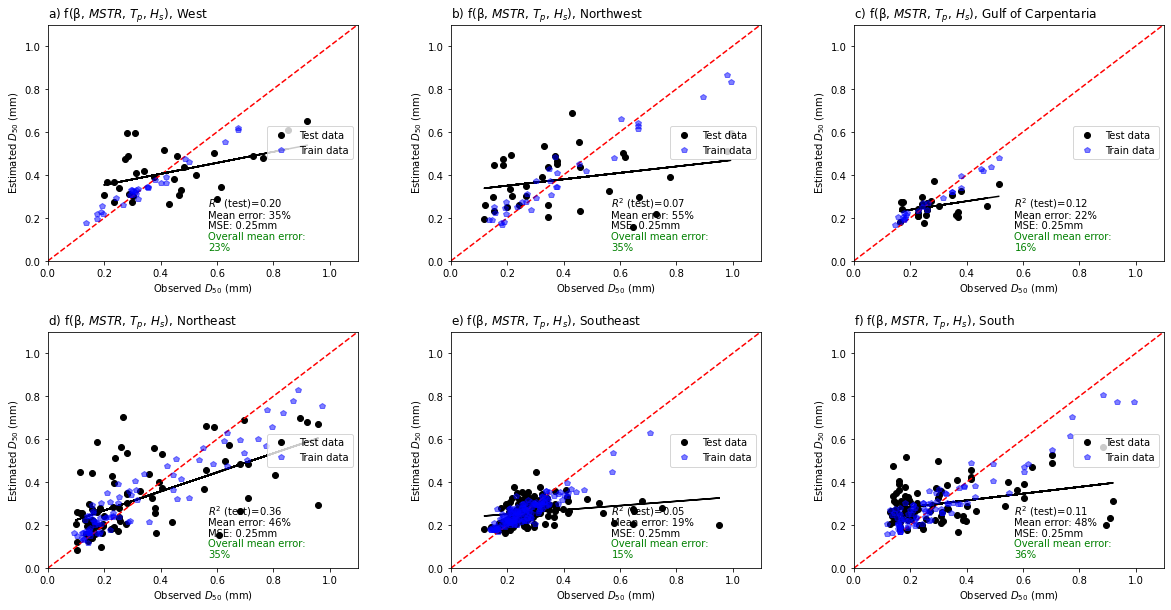

In [638]:

# params = {
#     "n_estimators": 500,
#     "max_depth": 3,
#     "min_samples_split": 5,
#     "learning_rate": 0.01,
#     "loss": "squared_error",
#     "subsample": 1.0
# }

# test_size = 0.5


params = {
    "n_estimators": 500,
    "max_depth": 3,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
    "subsample": .5
}

test_size = 0.5


plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

##################
rand = np.random.randn(len(dfOzW))

feature_names1 = ['β (radians)','MSTR (m)',r'$T_p$ (s)',r'$H_s$ (m)',  'Random\n (non-dim.)']
X = np.stack((dfOzW['beach_slope_average'], dfOzW['mstr'], dfOzW['tp'], dfOzW['hs_mean'],  rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzW['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(231)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"a) f(β, $MSTR$, $T_p$, $H_s$), West", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzNW))

feature_names1 = ['β (radians)','MSTR (m)',r'$T_p$ (s)',r'$H_s$ (m)',  'Random\n (non-dim.)']
X = np.stack((dfOzNW['beach_slope_average'], dfOzNW['mstr'], dfOzNW['tp'], dfOzNW['hs_mean'],  rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzNW['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(232)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"b) f(β, $MSTR$, $T_p$, $H_s$), Northwest", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzCG))

feature_names1 = ['β (radians)','MSTR (m)',r'$T_p$ (s)',r'$H_s$ (m)',  'Random\n (non-dim.)']
X = np.stack((dfOzCG['beach_slope_average'], dfOzCG['mstr'], dfOzCG['tp'], dfOzCG['hs_mean'],  rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzCG['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(233)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"c) f(β, $MSTR$, $T_p$, $H_s$), Gulf of Carpentaria", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzNE))

feature_names1 = ['β (radians)','MSTR (m)',r'$T_p$ (s)',r'$H_s$ (m)',  'Random\n (non-dim.)']
X = np.stack((dfOzNE['beach_slope_average'], dfOzNE['mstr'], dfOzNE['tp'], dfOzNE['hs_mean'],  rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzNE['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(234)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"d) f(β, $MSTR$, $T_p$, $H_s$), Northeast", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzSE))

feature_names1 = ['β (radians)','MSTR (m)',r'$T_p$ (s)',r'$H_s$ (m)',  'Random\n (non-dim.)']
X = np.stack((dfOzSE['beach_slope_average'], dfOzSE['mstr'], dfOzSE['tp'], dfOzSE['hs_mean'],  rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzSE['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(235)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"e) f(β, $MSTR$, $T_p$, $H_s$), Southeast", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

###=====================
rand = np.random.randn(len(dfOzS))

feature_names1 = ['β (radians)','MSTR (m)',r'$T_p$ (s)',r'$H_s$ (m)',  'Random\n (non-dim.)']
X = np.stack((dfOzS['beach_slope_average'], dfOzS['mstr'], dfOzS['tp'], dfOzS['hs_mean'],  rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOzS['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(236)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"f) f(β, $MSTR$, $T_p$, $H_s$), South", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')


In [ ]:
## merge datasets

The mean squared error (MSE) on test set: 0.0264
The mean squared error (MSE) on test set: 0.0377


Text(0.57, 0.05, '26%')

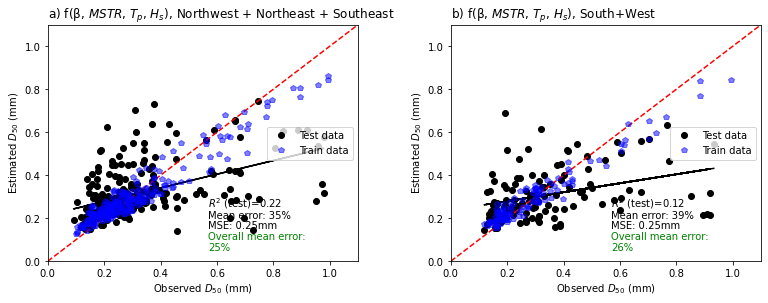

In [700]:
params = {
    "n_estimators": 500,
    "max_depth": 5,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
    "subsample": 0.5
}

test_size = 0.5


df = pd.concat([dfOzNW, dfOzSE, dfOzNE], ignore_index=True)
df = df.dropna()
len(df)


plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

##################
rand = np.random.randn(len(df))

feature_names1 = ['β (radians)','MSTR (m)',r'$T_p$ (s)',r'$H_s$ (m)',  'Random\n (non-dim.)']
X = np.stack((df['beach_slope_average'], df['mstr'], df['tp'], df['hs_mean'],  rand))
X.shape

# xscaler = preprocessing.StandardScaler().fit(X)
# X = xscaler.transform(X)
# X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, df['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(231)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"a) f(β, $MSTR$, $T_p$, $H_s$), Northwest + Northeast + Southeast", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')



df = pd.concat([dfOzW, dfOzS], ignore_index=True)
df = df.dropna()
len(df)

##################
rand = np.random.randn(len(df))

feature_names1 = ['β (radians)','MSTR (m)',r'$T_p$ (s)',r'$H_s$ (m)',  'Random\n (non-dim.)']
X = np.stack((df['beach_slope_average'], df['mstr'], df['tp'], df['hs_mean'],  rand))
X.shape

# xscaler = preprocessing.StandardScaler().fit(X)
# X = xscaler.transform(X)
# X.shape


X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, df['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(232)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"b) f(β, $MSTR$, $T_p$, $H_s$), South+West", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))


ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')




The mean squared error (MSE) on test set: 0.0272
The mean squared error (MSE) on test set: 0.0386


Text(0.57, 0.05, '27%')

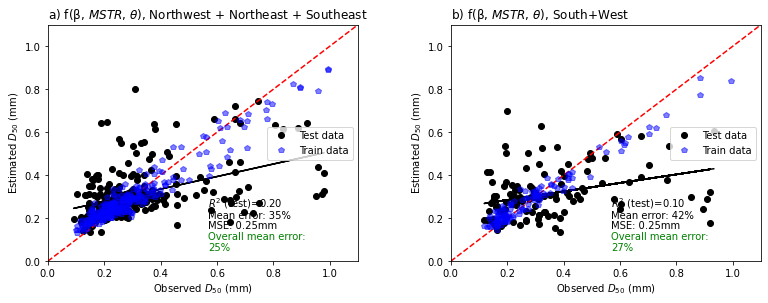

In [698]:
params = {
    "n_estimators": 500,
    "max_depth": 5,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
    "subsample": 0.5
}

test_size = 0.5


df = pd.concat([dfOzNW, dfOzSE, dfOzNE], ignore_index=True)
df = df.dropna()
len(df)


plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

##################
rand = np.random.randn(len(df))

feature_names1 = ['β (radians)','MSTR (m)',r'$\theta$ (deg.)', 'Random\n (non-dim.)']
X = np.stack((df['beach_slope_average'], df['mstr'], df['dir'],rand))
X.shape

# xscaler = preprocessing.StandardScaler().fit(X)
# X = xscaler.transform(X)
# X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, df['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(231)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"a) f(β, $MSTR$, $\theta$), Northwest + Northeast + Southeast", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')



df = pd.concat([dfOzW, dfOzS], ignore_index=True)
df = df.dropna()
len(df)

##################
rand = np.random.randn(len(df))

feature_names1 = ['β (radians)','MSTR (m)',r'$T_p$ (s)',r'$H_s$ (m)',  'Random\n (non-dim.)']
X = np.stack((df['beach_slope_average'], df['mstr'], df['tp'], df['hs_mean'],  rand))
X.shape

# xscaler = preprocessing.StandardScaler().fit(X)
# X = xscaler.transform(X)
# X.shape


X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, df['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(232)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"b) f(β, $MSTR$, $\theta$), South+West", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))


ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')




The mean squared error (MSE) on test set: 0.0280
The mean squared error (MSE) on test set: 0.0418


Text(0.57, 0.05, '30%')

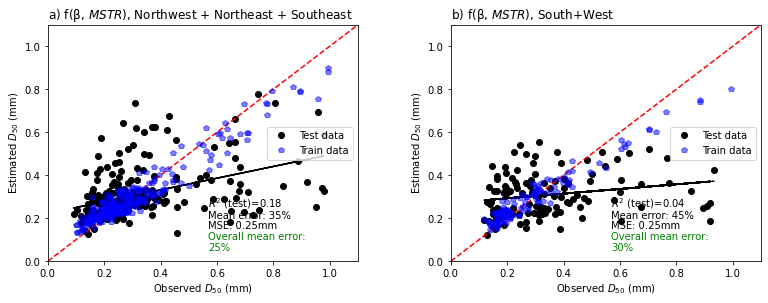

In [699]:
params = {
    "n_estimators": 500,
    "max_depth": 5,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
    "subsample": 0.5
}

test_size = 0.5


df = pd.concat([dfOzNW, dfOzSE, dfOzNE], ignore_index=True)
df = df.dropna()
len(df)


plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

##################
rand = np.random.randn(len(df))

feature_names1 = ['β (radians)','MSTR (m)', 'Random\n (non-dim.)']
X = np.stack((df['beach_slope_average'], df['mstr'], rand))
X.shape

# xscaler = preprocessing.StandardScaler().fit(X)
# X = xscaler.transform(X)
# X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, df['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(231)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"a) f(β, $MSTR$), Northwest + Northeast + Southeast", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')



df = pd.concat([dfOzW, dfOzS], ignore_index=True)
df = df.dropna()
len(df)

##################
rand = np.random.randn(len(df))

feature_names1 = ['β (radians)','MSTR (m)', 'Random\n (non-dim.)']
X = np.stack((df['beach_slope_average'], df['mstr'], rand))
X.shape

# xscaler = preprocessing.StandardScaler().fit(X)
# X = xscaler.transform(X)
# X.shape


X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, df['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(232)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"b) f(β, $MSTR$), South+West", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))


ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')




In [701]:
len(dfOz)

809

In [719]:
dfOz.rename(columns = {'Hs_max':'hs_max', 'Hs_mean':'hs_mean', 'Tp_mean': 'tp', 'Wdir_mean':'dir'}, inplace = True)
dfOz = dfOz[['latitude', 'longitude', 'd50',
        'beach_slope_average', 'mstr', 
        'hs_max', 'hs_mean', 'dir', 'tp']].copy()

In [720]:
dfOz_micro = dfOz[dfOz['mstr']<2]
len(dfOz_micro)

480

In [721]:
dfOz_micro.keys()

Index(['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'hs_max',
       'hs_mean', 'dir', 'tp'],
      dtype='object')

In [722]:
dfOz_meso = dfOz[(dfOz['mstr']>=2) & (dfOz['mstr']<4)]
len(dfOz_meso)

223

In [723]:
dfOz_macro = dfOz[dfOz['mstr']>=4]
len(dfOz_macro)

106

The mean squared error (MSE) on test set: 0.0188
The mean squared error (MSE) on test set: 0.0423
The mean squared error (MSE) on test set: 0.0505


Text(0.57, 0.05, '45%')

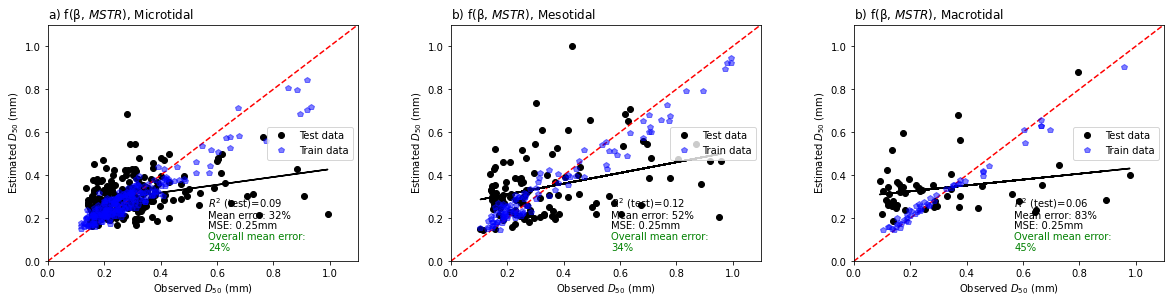

In [724]:
params = {
    "n_estimators": 500,
    "max_depth": 5,
    "min_samples_split": 3,
    "learning_rate": 0.01,
    "loss": "squared_error",
    "subsample": .5
}

test_size = 0.5


plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

##################
rand = np.random.randn(len(dfOz_micro))

feature_names1 = ['β (radians)','MSTR (m)', 'Random\n (non-dim.)']
X = np.stack((dfOz_micro['beach_slope_average'], dfOz_micro['mstr'], rand))
X.shape

# xscaler = preprocessing.StandardScaler().fit(X)
# X = xscaler.transform(X)
# X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOz_micro['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(231)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"a) f(β, $MSTR$), Microtidal", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')



##################
rand = np.random.randn(len(dfOz_meso))

feature_names1 = ['β (radians)','MSTR (m)', 'Random\n (non-dim.)']
X = np.stack((dfOz_meso['beach_slope_average'], dfOz_meso['mstr'], rand))
X.shape

# xscaler = preprocessing.StandardScaler().fit(X)
# X = xscaler.transform(X)
# X.shape


X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOz_meso['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(232)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"b) f(β, $MSTR$), Mesotidal", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))


ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')



##################
rand = np.random.randn(len(dfOz_macro))

feature_names1 = ['β (radians)','MSTR (m)', 'Random\n (non-dim.)']
X = np.stack((dfOz_macro['beach_slope_average'], dfOz_macro['mstr'], rand))
X.shape

# xscaler = preprocessing.StandardScaler().fit(X)
# X = xscaler.transform(X)
# X.shape


X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOz_macro['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))


plt.subplot(233)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"b) f(β, $MSTR$), Macrotidal", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))


ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')



The mean squared error (MSE) on test set: 0.0168
The mean squared error (MSE) on test set: 0.0341
The mean squared error (MSE) on test set: 0.0428


Text(0.57, 0.05, '42%')

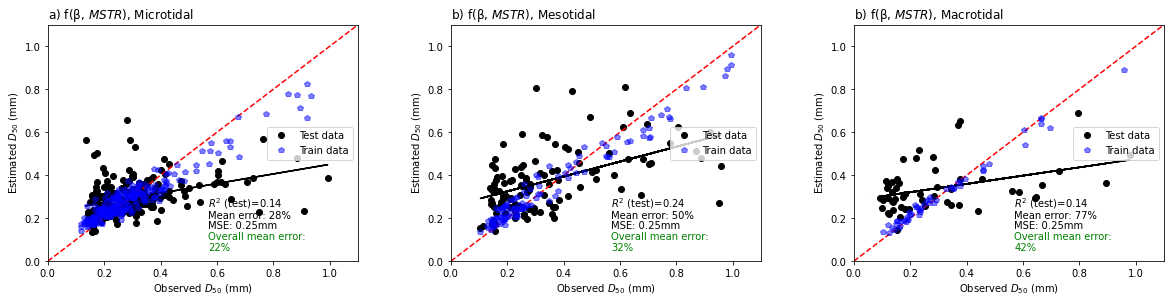

In [725]:
params = {
    "n_estimators": 500,
    "max_depth": 5,
    "min_samples_split": 3,
    "learning_rate": 0.01,
    "loss": "squared_error",
    "subsample": .5
}

test_size = 0.5


plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

##################
rand = np.random.randn(len(dfOz_micro))

feature_names1 = ['β (radians)','MSTR (m)',r'$T_p$ (s)',r'$H_s$ (m)',  'Random\n (non-dim.)']
X = np.stack((dfOz_micro['beach_slope_average'], dfOz_micro['mstr'], dfOz_micro['tp'], dfOz_micro['hs_mean'],  rand))
X.shape

# xscaler = preprocessing.StandardScaler().fit(X)
# X = xscaler.transform(X)
# X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOz_micro['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(231)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"a) f(β, $MSTR$), Microtidal", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')



##################
rand = np.random.randn(len(dfOz_meso))

feature_names1 = ['β (radians)','MSTR (m)',r'$T_p$ (s)',r'$H_s$ (m)',  'Random\n (non-dim.)']
X = np.stack((dfOz_meso['beach_slope_average'], dfOz_meso['mstr'], dfOz_meso['tp'], dfOz_meso['hs_mean'],  rand))
X.shape

# xscaler = preprocessing.StandardScaler().fit(X)
# X = xscaler.transform(X)
# X.shape


X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOz_meso['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(232)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"b) f(β, $MSTR$), Mesotidal", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))


ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')



##################
rand = np.random.randn(len(dfOz_macro))

feature_names1 = ['β (radians)','MSTR (m)',r'$T_p$ (s)',r'$H_s$ (m)',  'Random\n (non-dim.)']
X = np.stack((dfOz_macro['beach_slope_average'], dfOz_macro['mstr'], dfOz_macro['tp'], dfOz_macro['hs_mean'],  rand))
X.shape

# xscaler = preprocessing.StandardScaler().fit(X)
# X = xscaler.transform(X)
# X.shape


X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOz_macro['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))


plt.subplot(233)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"b) f(β, $MSTR$), Macrotidal", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))


ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')



In [726]:
from sklearn.model_selection import GridSearchCV

In [731]:
parameters = {
    'n_estimators':[100,500], 
    'max_depth':[3,5,7], 
    "min_samples_split":[3,5,7], 
    "learning_rate": [0.001,0.01,0.1], 
    "subsample": [0.5,1.0],
    "loss": ["squared_error", "huber"]
}

In [739]:
parameters = {
    'n_estimators':[100,500,1000], 
    'max_depth':[3,5,7,9], 
    "min_samples_split":[3,5,7,9], 
    "learning_rate": [0.001,0.01,0.1], 
    "subsample": [0.5,0.75,1.0],
    "loss": ["squared_error", "huber"]
}

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
The mean squared error (MSE) on test set: 0.0166
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
The mean squared error (MSE) on test set: 0.0330
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
The mean squared error (MSE) on test set: 0.0410


Text(0.57, 0.05, '52%')

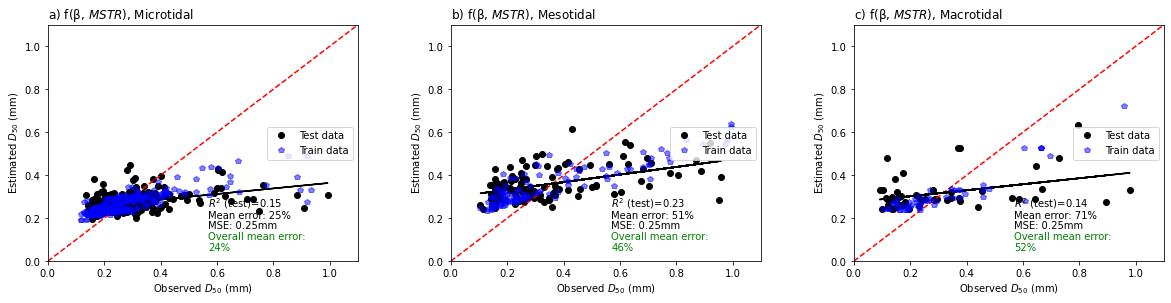

In [740]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

##################
rand = np.random.randn(len(dfOz_micro))

feature_names1 = ['β (radians)','MSTR (m)',r'$T_p$ (s)',r'$H_s$ (m)',  'Random\n (non-dim.)']
X = np.stack((dfOz_micro['beach_slope_average'], dfOz_micro['mstr'], dfOz_micro['tp'], dfOz_micro['hs_mean'],  rand))
X.shape

# xscaler = preprocessing.StandardScaler().fit(X)
# X = xscaler.transform(X)
# X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOz_micro['d50'], test_size=test_size, random_state=2022
)

gbr = ensemble.GradientBoostingRegressor(**params)

model1 = GridSearchCV(gbr, parameters, n_jobs=-1, verbose=2)

model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

sorted(model1.cv_results_.keys())
model1.best_params_

plt.subplot(231)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"a) f(β, $MSTR$), Microtidal", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))


ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')



##################
rand = np.random.randn(len(dfOz_meso))

feature_names1 = ['β (radians)','MSTR (m)',r'$T_p$ (s)',r'$H_s$ (m)',  'Random\n (non-dim.)']
X = np.stack((dfOz_meso['beach_slope_average'], dfOz_meso['mstr'], dfOz_meso['tp'], dfOz_meso['hs_mean'],  rand))
X.shape

# xscaler = preprocessing.StandardScaler().fit(X)
# X = xscaler.transform(X)
# X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOz_meso['d50'], test_size=test_size, random_state=2022
)

gbr = ensemble.GradientBoostingRegressor(**params)

model1 = GridSearchCV(gbr, parameters, n_jobs=-1, verbose=2)

model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(232)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"b) f(β, $MSTR$), Mesotidal", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))


ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')




##################
rand = np.random.randn(len(dfOz_macro))

feature_names1 = ['β (radians)','MSTR (m)',r'$T_p$ (s)',r'$H_s$ (m)',  'Random\n (non-dim.)']
X = np.stack((dfOz_macro['beach_slope_average'], dfOz_macro['mstr'], dfOz_macro['tp'], dfOz_macro['hs_mean'],  rand))
X.shape

# xscaler = preprocessing.StandardScaler().fit(X)
# X = xscaler.transform(X)
# X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, dfOz_macro['d50'], test_size=test_size, random_state=2022
)

gbr = ensemble.GradientBoostingRegressor(**params)

model1 = GridSearchCV(gbr, parameters, n_jobs=-1, verbose=2)

model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

plt.subplot(233)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"c) f(β, $MSTR$), Macrotidal", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))


ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')



In [174]:
df_strat_lat = dfOz.copy()

num_cats=17
num_samples_per_category = 11

df_strat_lat['category'] = pd.cut(dfOz['latitude'], num_cats)
df_strat_lat = df_strat_lat.groupby(['category']).apply(lambda x: x.sample(num_samples_per_category, replace = False)).reset_index(drop = True)

len(df_strat_lat)

187

In [175]:
df_strat_lon = dfOz.copy()

num_cats=9
num_samples_per_category = 15

df_strat_lon['category'] = pd.cut(dfOz['longitude'], num_cats)
df_strat_lon = df_strat_lon.groupby(['category']).apply(lambda x: x.sample(num_samples_per_category, replace = False)).reset_index(drop = True)

len(df_strat_lon)

135

In [176]:
df_strat_mstr = dfOz.copy()

num_cats=6
num_samples_per_category = 17

df_strat_mstr['category'] = pd.cut(dfOz['mstr'], num_cats)
df_strat_mstr = df_strat_mstr.groupby(['category']).apply(lambda x: x.sample(num_samples_per_category, replace = False)).reset_index(drop = True)

len(df_strat_mstr)

102

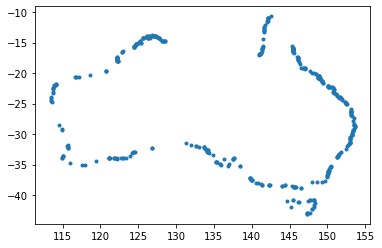

In [177]:
dfOz = pd.concat([df_strat_lat, df_strat_lon, df_strat_mstr], ignore_index=True)
dfOz = dfOz.dropna()
len(df)
dfOz = dfOz.drop_duplicates()
len(dfOz)

plt.plot(dfOz['longitude'], dfOz['latitude'],'.')

In [178]:
len(dfOz)

424

In [179]:
dfOz['code'] = np.zeros(len(dfOz))

In [180]:
# del df_strat_lat['category']

In [181]:
# df_strat_lat.to_csv('../model_data/dataset_Australia_coast_stratsample-by-lat.csv')
dfOz.to_csv('../model_data/dataset_Australia_coast_stratsample-by-lat-by-lon-by-mstr.csv')

In [182]:
dfOz.rename(columns = {'Hs_max':'hs_max', 'Hs_mean':'hs_mean', 'Tp_mean': 'tp', 'Wdir_mean':'dir'}, inplace = True)

In [184]:
dfEAus = dfOz[['latitude', 'longitude', 'd50',
        'beach_slope_average', 'mstr', 'code',
        'hs_max', 'hs_mean', 'dir', 'tp']].copy()

In [185]:
df = pd.concat([dfSEUS, dfEAus], ignore_index=True)
df = df.dropna()
len(df)

694

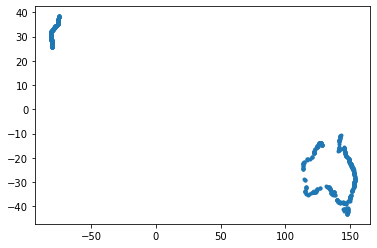

In [186]:
plt.plot(df['longitude'], df['latitude'],'.')

In [188]:
print(np.sum(df.code==0)) #Aus
print(np.sum(df.code==1)) #SEUS

424
270


In [190]:
X = pg.pairwise_corr(df[['beach_slope_average','d50','mstr','tp','dir','hs_mean']].copy(), columns=['d50'], method='spearman', alternative='greater', padjust='bonf').round(3)
Xoz = pg.pairwise_corr(df[['beach_slope_average','d50','mstr','tp','dir','hs_mean']].copy()[df['code']==0], columns=['d50'], method='spearman', alternative='greater', padjust='bonf').round(3)
Xus = pg.pairwise_corr(df[['beach_slope_average','d50','mstr','tp','dir','hs_mean']].copy()[df['code']==1], columns=['d50'], method='spearman', alternative='greater', padjust='bonf').round(3)

Text(0.0, 1.0, 'i) All samples (N = 694)')

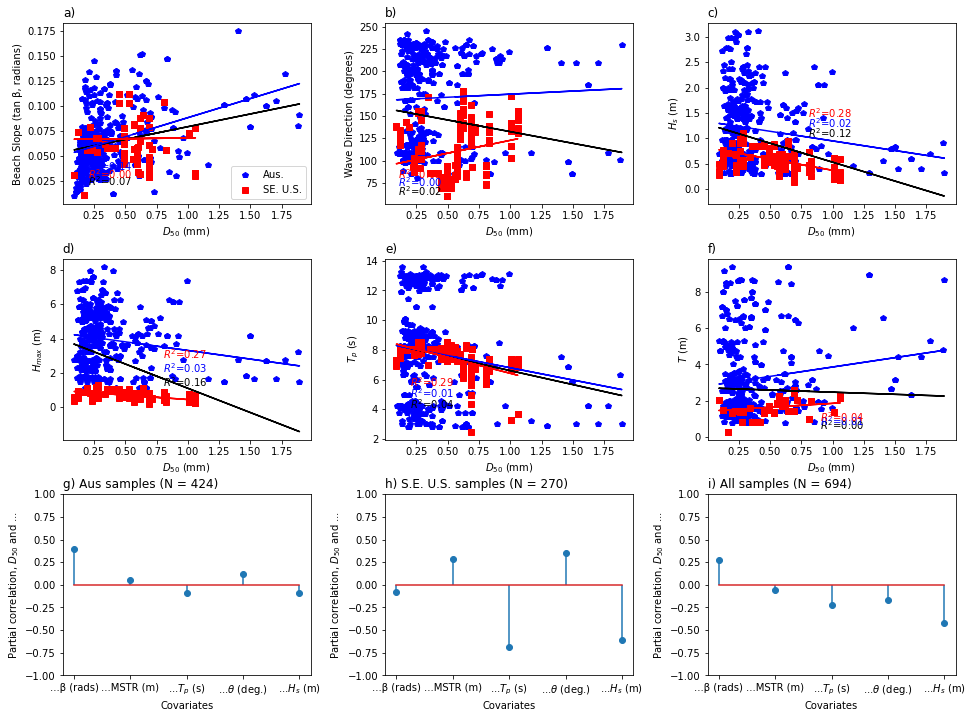

In [193]:
plt.figure(figsize=(16,12))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

#######################
plt.subplot(331)
plt.plot(df['d50'][df['code']==0], df['beach_slope_average'][df['code']==0],'bp', label='Aus.')
plt.plot(df['d50'][df['code']==1], df['beach_slope_average'][df['code']==1],'rs', label='SE. U.S.')
plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel('Beach Slope (tan β, radians)')
plt.title("a)", loc='left')
plt.legend(loc=4)

coef = np.polyfit(df['d50'], df['beach_slope_average'],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')

r2 = np.min(np.corrcoef(df['d50'], df['beach_slope_average']))**2
plt.text(.2,.02,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(df['d50'][df['code']==0], df['beach_slope_average'][df['code']==0],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'][df['code']==0], poly1d_fn(df['d50'][df['code']==0]), '-b')

r2 = np.min(np.corrcoef(df['d50'][df['code']==0], df['beach_slope_average'][df['code']==0]))**2
plt.text(.2,.035,r'$R^2$='+str(r2)[:4], color='b')

coef = np.polyfit(df['d50'][df['code']==1], df['beach_slope_average'][df['code']==1],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'][df['code']==1], poly1d_fn(df['d50'][df['code']==1]), '-r')

r2 = np.min(np.corrcoef(df['d50'][df['code']==1], df['beach_slope_average'][df['code']==1]))**2
plt.text(.2,.027,r'$R^2$='+str(r2)[:4], color='r')

#######################
plt.subplot(332)
plt.plot(df['d50'][df['code']==0], df['dir'][df['code']==0],'bp')
plt.plot(df['d50'][df['code']==1], df['dir'][df['code']==1],'rs')
plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel('Wave Direction (degrees)')
plt.title("b)", loc='left')

coef = np.polyfit(df['d50'], df['dir'],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')

r2 = np.min(np.corrcoef(df['d50'], df['dir']))**2
plt.text(.1,60,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(df['d50'][df['code']==0], df['dir'][df['code']==0],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'][df['code']==0], poly1d_fn(df['d50'][df['code']==0]), '-b')

r2 = np.min(np.corrcoef(df['d50'][df['code']==0], df['dir'][df['code']==0]))**2
plt.text(.1,70,r'$R^2$='+str(r2)[:4], color='b')

coef = np.polyfit(df['d50'][df['code']==1], df['dir'][df['code']==1],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'][df['code']==1], poly1d_fn(df['d50'][df['code']==1]), '-r')

r2 = np.min(np.corrcoef(df['d50'][df['code']==1], df['dir'][df['code']==1]))**2
plt.text(.1,80,r'$R^2$='+str(r2)[:4], color='r')

#######################
plt.subplot(333)
plt.plot(df['d50'][df['code']==0], df['hs_mean'][df['code']==0],'bp')
plt.plot(df['d50'][df['code']==1], df['hs_mean'][df['code']==1],'rs')
plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel(r'$H_{s}$ (m)')
plt.title("c)", loc='left')

coef = np.polyfit(df['d50'], df['hs_mean'],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')

r2 = np.min(np.corrcoef(df['d50'], df['hs_mean']))**2
plt.text(.8,1,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(df['d50'][df['code']==0], df['hs_mean'][df['code']==0],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'][df['code']==0], poly1d_fn(df['d50'][df['code']==0]), '-b')

r2 = np.min(np.corrcoef(df['d50'][df['code']==0], df['hs_mean'][df['code']==0]))**2
plt.text(.8,1.2,r'$R^2$='+str(r2)[:4], color='b')

coef = np.polyfit(df['d50'][df['code']==1], df['hs_mean'][df['code']==1],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'][df['code']==1], poly1d_fn(df['d50'][df['code']==1]), '-r')

r2 = np.min(np.corrcoef(df['d50'][df['code']==1], df['hs_mean'][df['code']==1]))**2
plt.text(.8,1.4,r'$R^2$='+str(r2)[:4], color='r')

#######################
plt.subplot(334)
plt.plot(df['d50'][df['code']==0], df['hs_max'][df['code']==0],'bp')
plt.plot(df['d50'][df['code']==1], df['hs_max'][df['code']==1],'rs')
plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel(r'$H_{max}$ (m)')
plt.title("d)", loc='left')

coef = np.polyfit(df['d50'], df['hs_max'],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')

r2 = np.min(np.corrcoef(df['d50'], df['hs_max']))**2
plt.text(.8,1.2,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(df['d50'][df['code']==0], df['hs_max'][df['code']==0],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'][df['code']==0], poly1d_fn(df['d50'][df['code']==0]), '-b')

r2 = np.min(np.corrcoef(df['d50'][df['code']==0], df['hs_max'][df['code']==0]))**2
plt.text(.8,2,r'$R^2$='+str(r2)[:4], color='b')

coef = np.polyfit(df['d50'][df['code']==1], df['hs_max'][df['code']==1],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'][df['code']==1], poly1d_fn(df['d50'][df['code']==1]), '-r')

r2 = np.min(np.corrcoef(df['d50'][df['code']==1], df['hs_max'][df['code']==1]))**2
plt.text(.8,2.8,r'$R^2$='+str(r2)[:4], color='r')

#######################
plt.subplot(335)
plt.plot(df['d50'][df['code']==0], df['tp'][df['code']==0],'bp')
plt.plot(df['d50'][df['code']==1], df['tp'][df['code']==1],'rs')
plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel(r'$T_{p}$ (s)')
plt.title("e)", loc='left')

coef = np.polyfit(df['d50'], df['tp'],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')

r2 = np.min(np.corrcoef(df['d50'], df['tp']))**2
plt.text(.2,4,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(df['d50'][df['code']==0], df['tp'][df['code']==0],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'][df['code']==0], poly1d_fn(df['d50'][df['code']==0]), '-b')

r2 = np.min(np.corrcoef(df['d50'][df['code']==0], df['tp'][df['code']==0]))**2
plt.text(.2,4.75,r'$R^2$='+str(r2)[:4], color='b')

coef = np.polyfit(df['d50'][df['code']==1], df['tp'][df['code']==1],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'][df['code']==1], poly1d_fn(df['d50'][df['code']==1]), '-r')

r2 = np.min(np.corrcoef(df['d50'][df['code']==1], df['tp'][df['code']==1]))**2
plt.text(.2,5.5,r'$R^2$='+str(r2)[:4], color='r')

#######################
plt.subplot(336)
plt.plot(df['d50'][df['code']==0],df['mstr'][df['code']==0] ,'bp')
plt.plot(df['d50'][df['code']==1],df['mstr'][df['code']==1] ,'rs')
plt.xlabel(r'$D_{50}$ (mm)')
plt.ylabel(r'$T$ (m)')
plt.title("f)", loc='left')

coef = np.polyfit(df['d50'], df['mstr'],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')

r2 = np.min(np.corrcoef(df['d50'], df['mstr']))**2
plt.text(.9,.4,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(df['d50'][df['code']==0], df['mstr'][df['code']==0],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'][df['code']==0], poly1d_fn(df['d50'][df['code']==0]), '-b')

r2 = np.min(np.corrcoef(df['d50'][df['code']==0], df['mstr'][df['code']==0]))**2
plt.text(.9,.6,r'$R^2$='+str(r2)[:4], color='b')

coef = np.polyfit(df['d50'][df['code']==1], df['mstr'][df['code']==1],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'][df['code']==1], poly1d_fn(df['d50'][df['code']==1]), '-r')

r2 = np.min(np.corrcoef(df['d50'][df['code']==1], df['mstr'][df['code']==1]))**2
plt.text(.9,.8,r'$R^2$='+str(r2)[:4], color='r')

#######################
ax = plt.subplot(337)
plt.stem(Xoz['r'])
plt.xticks([0,1,2,3,4])
ax.set_xticklabels(['...β (rads)','...MSTR (m)',r'...$T_p$ (s)',r'...$\theta$ (deg.)',r'...$H_s$ (m)'])
plt.ylim(-1,1)
plt.ylabel(r'Partial correlation, $D_{50}$ and ...')
plt.xlabel(r'Covariates')
plt.title(r"g) Aus samples (N = {})".format(len(df[df['code']==0])), loc='left')

#######################
ax = plt.subplot(338)
plt.stem(Xus['r'])
plt.xticks([0,1,2,3,4])
ax.set_xticklabels(['...β (rads)','...MSTR (m)',r'...$T_p$ (s)',r'...$\theta$ (deg.)',r'...$H_s$ (m)'])
plt.ylim(-1,1)
plt.ylabel(r'Partial correlation, $D_{50}$ and ...')
plt.xlabel(r'Covariates')
plt.title(r"h) S.E. U.S. samples (N = {})".format(len(df[df['code']==1])), loc='left')

#######################
ax = plt.subplot(339)
plt.stem(X['r'])
plt.xticks([0,1,2,3,4])
ax.set_xticklabels(['...β (rads)','...MSTR (m)',r'...$T_p$ (s)',r'...$\theta$ (deg.)',r'...$H_s$ (m)'])
plt.ylim(-1,1)
plt.ylabel(r'Partial correlation, $D_{50}$ and ...')
plt.xlabel(r'Covariates')
plt.title(r"i) All samples (N = {})".format(len(df)), loc='left')

# plt.savefig('../data_plots/SEUS_wholeAus_d50-linreg-partcorrel-df_strat_lat.jpg', dpi=300, bbox_inches='tight')

In [195]:
ds_est_baseline = np.array([mcfall(X,hs) for X,hs in zip(1/df['beach_slope_average'],df['hs_mean'])])

a = -0.154
b = -0.145
c = 0.268

ds_est_baseline2 = np.array([bujan(B,a,b,c) for B in df['beach_slope_average']])

Text(0.72, 0.65, 'S.E. U.S. 58%')

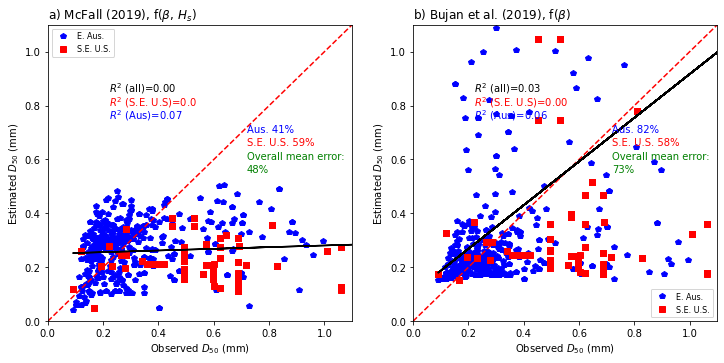

In [196]:
plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.subplot(221)
plt.plot(df['d50'][df['code']==0], ds_est_baseline[df['code']==0], 'bp', label='E. Aus.')
plt.plot(df['d50'][df['code']==1], ds_est_baseline[df['code']==1], 'rs', label='S.E. U.S.')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"a) McFall (2019), f($\beta$, $H_s$)", loc='left')
r2 = np.min(np.corrcoef(df['d50'], ds_est_baseline))**2
plt.text(.22,.85,r'$R^2$ (all)='+str(r2)[:4], color='k')

r2 = np.min(np.corrcoef(df['d50'][df['code']==1], ds_est_baseline[df['code']==1]))**2
r2=0.0
plt.text(.22,.8,r'$R^2$ (S.E. U.S)='+str(r2)[:4], color='r')

r2 = np.min(np.corrcoef(df['d50'][df['code']==0], ds_est_baseline[df['code']==0]))**2
if r2>1:
    r2=0.0
plt.text(.22,.75,r'$R^2$ (Aus)='+str(r2)[:4], color='b')


coef = np.polyfit(df['d50'], ds_est_baseline,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')
plt.legend(fontsize=8)

plt.text(.72,.6, r'Overall mean error:', color='g')
plt.text(.72,.55, r'{}%'.format(str(np.mean(prc_err(df['d50'], ds_est_baseline)))[:2]), color='g')
plt.text(.72,.7, r'Aus. {}%'.format(str(np.mean(prc_err(df['d50'][df['code']==0], ds_est_baseline[df['code']==0])))[:2]), color='b')
plt.text(.72,.65, r'S.E. U.S. {}%'.format(str(np.mean(prc_err(df['d50'][df['code']==1], ds_est_baseline[df['code']==1])))[:2]), color='r')


plt.subplot(222)
# plt.plot(df['d50'], ds_est_baseline2, 'k.', label=r"")
plt.plot(df['d50'][df['code']==0], ds_est_baseline2[df['code']==0], 'bp', label='E. Aus.')
plt.plot(df['d50'][df['code']==1], ds_est_baseline2[df['code']==1], 'rs', label='S.E. U.S.')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"b) Bujan et al. (2019), f($\beta$)", loc='left')
r2 = np.min(np.corrcoef(df['d50'], ds_est_baseline2))**2
plt.text(.22,.85,r'$R^2$ (all)='+str(r2)[:4], color='k')

coef = np.polyfit(df['d50'], ds_est_baseline2,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')
plt.legend(fontsize=8)

r2 = np.min(np.corrcoef(df['d50'][df['code']==1], ds_est_baseline2[df['code']==1]))**2
if r2>1:
    r2=0.0
plt.text(.22,.8,r'$R^2$ (S.E. U.S)='+str(r2)[:4], color='r')

r2 = np.min(np.corrcoef(df['d50'][df['code']==0], ds_est_baseline2[df['code']==0]))**2
if r2>1:
    r2=0.0
plt.text(.22,.75,r'$R^2$ (Aus)='+str(r2)[:4], color='b')

plt.text(.72,.6, r'Overall mean error:', color='g')
plt.text(.72,.55, r'{}%'.format(str(np.mean(prc_err(df['d50'], ds_est_baseline2)))[:2]), color='g')

# plt.text(.72,.6, r'Overall mean error:', color='g')
plt.text(.72,.7, r'Aus. {}%'.format(str(np.mean(prc_err(df['d50'][df['code']==0], ds_est_baseline2[df['code']==0])))[:2]), color='b')
plt.text(.72,.65, r'S.E. U.S. {}%'.format(str(np.mean(prc_err(df['d50'][df['code']==1], ds_est_baseline2[df['code']==1])))[:2]), color='r')

# plt.savefig('../model_plots/SEUS-wholeOz_d50-baseline-skill.jpg', dpi=300, bbox_inches='tight')

In [397]:
params = {
    "n_estimators": 500,
    "max_depth": 6,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

test_size = 0.7


In [398]:
# rand = np.random.randn(len(df))
# np.save('../model_out/SEUS_wholeOz_rand.npy', rand, allow_pickle=True)

In [399]:
rand = np.load('../model_out/SEUS_wholeOz_rand.npy', allow_pickle=True)

In [400]:
Smean = []
Sstd = []

In [401]:
feature_names1 = ['β (radians)', 'Random\n (non-dim.)']
X = np.stack((df['beach_slope_average'], rand))
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, df['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

The mean squared error (MSE) on test set: 0.0684


In [402]:
model1out = {}
model1out['feature_names'] = feature_names1
model1out['Xtest'] = X_test1
model1out['Xtrain'] = X_train1
model1out['ytest'] = y_test1
model1out['ytrain'] = y_train1
model1out['model'] = model1
model1out['mse'] = mse1

In [403]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=2022)
# evaluate model
scores = cross_val_score(model1, X_test1, y_test1, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

# force scores to be positive
scores = np.absolute(scores)
print('Mean RMSE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Smean.append(scores.mean())
Sstd.append(scores.std())

Mean RMSE: 0.259 (0.054)


In [404]:
feature_names2 = [r'MSTR (m)', 'Random\n (non-dim.)']
# X = np.stack((df['beach_slope_median'],df['mstr'], rand))
X = np.stack((df['mstr'], rand))
# X = np.stack((df['beach_slope'],df['mstr'], rand))
X.shape

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X.T, df['d50'], test_size=test_size, random_state=2022
)

model2 = ensemble.GradientBoostingRegressor(**params)
model2.fit(X_train2, y_train2)

mse2 = mean_squared_error(y_test2, model2.predict(X_test2))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse2))

The mean squared error (MSE) on test set: 0.0762


In [405]:
model2out = {}
model2out['feature_names'] = feature_names2
model2out['Xtest'] = X_test2
model2out['Xtrain'] = X_train2
model2out['ytest'] = y_test2
model2out['ytrain'] = y_train2
model2out['model'] = model2
model2out['mse'] = mse2

In [406]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=2022)
# evaluate model
scores = cross_val_score(model2, X_test2, y_test2, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

# force scores to be positive
scores = np.absolute(scores)
print('Mean RMSE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Smean.append(scores.mean())
Sstd.append(scores.std())

Mean RMSE: 0.242 (0.060)


In [407]:
feature_names3 = ['β (radians)','MSTR (m)', 'Random\n (non-dim.)']
X = np.stack((df['beach_slope_average'], df['mstr'], rand))
X.shape

X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X.T, df['d50'], test_size=test_size, random_state=2022
)

model3 = ensemble.GradientBoostingRegressor(**params)
model3.fit(X_train3, y_train3)

mse3 = mean_squared_error(y_test3, model3.predict(X_test3))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse3))

The mean squared error (MSE) on test set: 0.0616


In [408]:
model3out = {}
model3out['feature_names'] = feature_names3
model3out['Xtest'] = X_test3
model3out['Xtrain'] = X_train3
model3out['ytest'] = y_test3
model3out['ytrain'] = y_train3
model3out['model'] = model3
model3out['mse'] = mse3

In [409]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=2022)
# evaluate model
scores = cross_val_score(model3, X_test3, y_test3, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

# force scores to be positive
scores = np.absolute(scores)
print('Mean RMSE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Smean.append(scores.mean())
Sstd.append(scores.std())

Mean RMSE: 0.234 (0.054)


In [410]:
feature_names4 = ['β (radians)','MSTR (m)',r'$T_p$ (s)', 'Random\n (non-dim.)']
X = np.stack((df['beach_slope_average'], df['mstr'], df['tp'], rand))
X.shape

X_train4, X_test4, y_train4, y_test4 = train_test_split(
    X.T, df['d50'], test_size=test_size, random_state=2022
)

model4 = ensemble.GradientBoostingRegressor(**params)
model4.fit(X_train4, y_train4)

mse4 = mean_squared_error(y_test4, model4.predict(X_test4))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse4))

The mean squared error (MSE) on test set: 0.0713


In [411]:
model4out = {}
model4out['feature_names'] = feature_names4
model4out['Xtest'] = X_test4
model4out['Xtrain'] = X_train4
model4out['ytest'] = y_test4
model4out['ytrain'] = y_train4
model4out['model'] = model4
model4out['mse'] = mse4

In [412]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=2022)
# evaluate model
scores = cross_val_score(model4, X_test4, y_test4, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

# force scores to be positive
scores = np.absolute(scores)
print('Mean RMSE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Smean.append(scores.mean())
Sstd.append(scores.std())

Mean RMSE: 0.222 (0.053)


In [413]:
feature_names5 = ['β (radians)','MSTR (m)',r'$H_s$ (m)', 'Random\n (non-dim.)']
X = np.stack((df['beach_slope_average'], df['mstr'], df['hs_mean'], rand))
X.shape

X_train5, X_test5, y_train5, y_test5 = train_test_split(
    X.T, df['d50'], test_size=test_size, random_state=2022
)

model5 = ensemble.GradientBoostingRegressor(**params)
model5.fit(X_train5, y_train5)

mse5 = mean_squared_error(y_test5, model5.predict(X_test5))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse5))

The mean squared error (MSE) on test set: 0.0715


In [414]:
model5out = {}
model5out['feature_names'] = feature_names5
model5out['Xtest'] = X_test5
model5out['Xtrain'] = X_train5
model5out['ytest'] = y_test5
model5out['ytrain'] = y_train5
model5out['model'] = model5
model5out['mse'] = mse5

In [415]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=2022)
# evaluate model
scores = cross_val_score(model5, X_test5, y_test5, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

# force scores to be positive
scores = np.absolute(scores)
print('Mean RMSE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Smean.append(scores.mean())
Sstd.append(scores.std())

Mean RMSE: 0.238 (0.054)


In [416]:
feature_names6 = ['β (radians)','MSTR (m)',r'$\theta$ (deg.)', 'Random\n (non-dim.)']
X = np.stack((df['beach_slope_average'], df['mstr'], df['dir'], rand))
X.shape

X_train6, X_test6, y_train6, y_test6 = train_test_split(
    X.T, df['d50'], test_size=test_size, random_state=2022
)

model6 = ensemble.GradientBoostingRegressor(**params)
model6.fit(X_train6, y_train6)

mse6 = mean_squared_error(y_test6,model6.predict(X_test6))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse6))

The mean squared error (MSE) on test set: 0.0575


In [417]:
model6out = {}
model6out['feature_names'] = feature_names6
model6out['Xtest'] = X_test6
model6out['Xtrain'] = X_train6
model6out['ytest'] = y_test6
model6out['ytrain'] = y_train6
model6out['model'] = model6
model6out['mse'] = mse6

In [418]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=2022)
# evaluate model
scores = cross_val_score(model6, X_test6, y_test6, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

# force scores to be positive
scores = np.absolute(scores)
print('Mean RMSE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Smean.append(scores.mean())
Sstd.append(scores.std())

Mean RMSE: 0.222 (0.061)


In [419]:
feature_names7 = ['MSTR (m)',r'$T_p$ (s)',r'$H_s$ (m)', 'Random\n (non-dim.)']
X = np.stack((df['mstr'], df['tp'], df['hs_mean'],  rand))
X.shape

X_train7, X_test7, y_train7, y_test7 = train_test_split(
    X.T, df['d50'], test_size=test_size, random_state=2022
)

model7 = ensemble.GradientBoostingRegressor(**params)
model7.fit(X_train7, y_train7)

mse7 = mean_squared_error(y_test7,model7.predict(X_test7))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse7))

The mean squared error (MSE) on test set: 0.0828


In [420]:
model7out = {}
model7out['feature_names'] = feature_names7
model7out['Xtest'] = X_test7
model7out['Xtrain'] = X_train7
model7out['ytest'] = y_test7
model7out['ytrain'] = y_train7
model7out['model'] = model7
model7out['mse'] = mse7

In [421]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=2022)
# evaluate model
scores = cross_val_score(model7, X_test7, y_test7, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

# force scores to be positive
scores = np.absolute(scores)
print('Mean RMSE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Smean.append(scores.mean())
Sstd.append(scores.std())

Mean RMSE: 0.244 (0.063)


In [422]:
feature_names8 = ['β (radians)','MSTR (m)',r'$T_p$ (s)',r'$H_s$ (m)',  'Random\n (non-dim.)']
X = np.stack((df['beach_slope_average'], df['mstr'], df['tp'], df['hs_mean'],  rand))
X.shape

X_train8, X_test8, y_train8, y_test8= train_test_split(
    X.T, df['d50'], test_size=test_size, random_state=2022
)

model8= ensemble.GradientBoostingRegressor(**params)
model8.fit(X_train8, y_train8)

mse8 = mean_squared_error(y_test8,model8.predict(X_test8))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse8))

The mean squared error (MSE) on test set: 0.0791


In [423]:
model8out = {}
model8out['feature_names'] = feature_names8
model8out['Xtest'] = X_test8
model8out['Xtrain'] = X_train8
model8out['ytest'] = y_test8
model8out['ytrain'] = y_train8
model8out['model'] = model8
model8out['mse'] = mse8

In [424]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=2022)
# evaluate model
scores = cross_val_score(model8, X_test8, y_test8, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

# force scores to be positive
scores = np.absolute(scores)
print('Mean RMSE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Smean.append(scores.mean())
Sstd.append(scores.std())

Mean RMSE: 0.228 (0.056)


Text(0.57, 0.05, '33%')

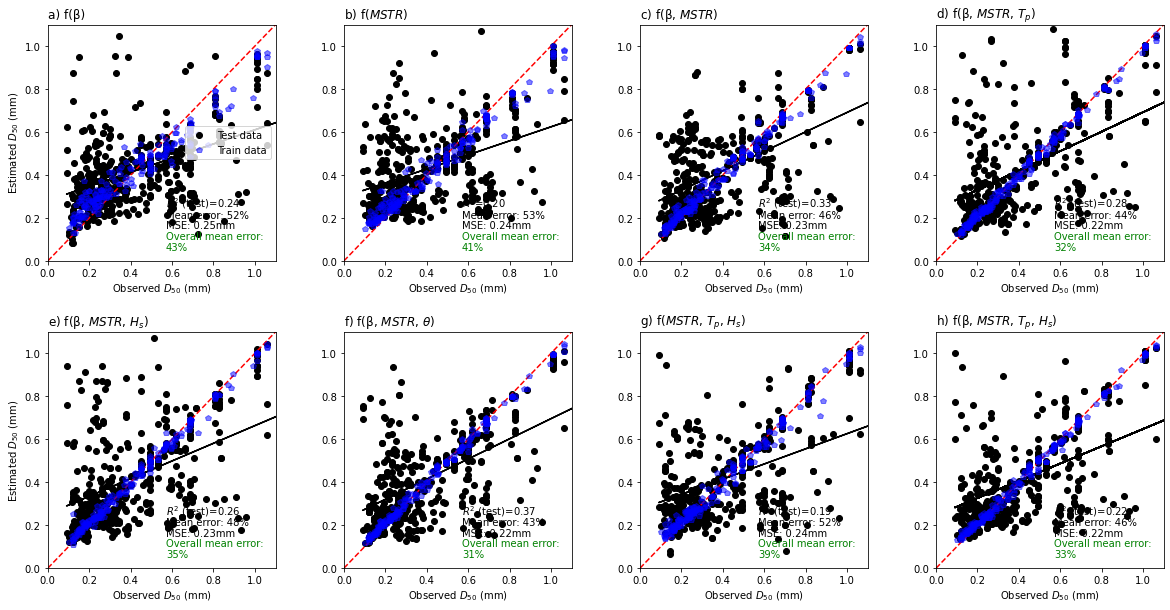

In [425]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(241)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko', label='Test data')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"a) f(β)", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

ds_est2 = model1.predict(X_train1)
plt.plot(y_train1, ds_est2, 'bp', alpha=0.5, label='Train data')
plt.legend(loc=5)

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test1,y_train1)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

plt.subplot(242)
ds_est = model2.predict(X_test2)
plt.plot(y_test2, ds_est, 'ko')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
# plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"b) f($MSTR$)", loc='left')
r2 = np.min(np.corrcoef(y_test2, ds_est))**2
plt.text(.57,.25,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(y_test2, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test2, poly1d_fn(y_test2), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test2,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[1])[:4]))

ds_est2 = model2.predict(X_train2)
plt.plot(y_train2, ds_est2, 'bp', alpha=0.5, label='Train data')

plt.text(.57,.10, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test2,y_train2)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

plt.subplot(243)
ds_est = model3.predict(X_test3)
plt.plot(y_test3, ds_est, 'ko')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
# plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title("c) f(β, $MSTR$)", loc='left')
r2 = np.min(np.corrcoef(y_test3, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test3, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test3, poly1d_fn(y_test3), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test3,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[2])[:4]))

ds_est2 = model3.predict(X_train3)
plt.plot(y_train3, ds_est2, 'bp', alpha=0.5, label='Train data')

plt.text(.57,.1, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test3,y_train3)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

plt.subplot(244)
ds_est = model4.predict(X_test4)
plt.plot(y_test4, ds_est, 'ko')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.title(r"d) f(β, $MSTR$, $T_p$)", loc='left')
r2 = np.min(np.corrcoef(y_test4, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])
plt.text(.57,.2, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test4,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[3])[:4]))

coef = np.polyfit(y_test4, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test4, poly1d_fn(y_test4), '-k')

ds_est2 = model4.predict(X_train4)
plt.plot(y_train4, ds_est2, 'bp', alpha=0.5, label='Train data')

plt.text(.57,.1, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test4,y_train4)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')


plt.subplot(245)
ds_est = model5.predict(X_test5)
plt.plot(y_test5, ds_est, 'ko')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"e) f(β, $MSTR$, $H_s$)", loc='left')
r2 = np.min(np.corrcoef(y_test5, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test5, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test5, poly1d_fn(y_test5), '-k')
plt.text(.57,.2, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test5,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[4])[:4]))

ds_est2 = model5.predict(X_train5)
plt.plot(y_train5, ds_est2, 'bp', alpha=0.5, label='Train data')

plt.text(.57,.1, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test5,y_train5)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')


plt.subplot(246)
ds_est = model6.predict(X_test6)
plt.plot(y_test6, ds_est, 'ko')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
# plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"f) f(β, $MSTR$, $\theta$)", loc='left')
r2 = np.min(np.corrcoef(y_test6, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test6, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test6, poly1d_fn(y_test6), '-k')
plt.text(.57,.2, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test6,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[5])[:4]))

ds_est2 = model6.predict(X_train6)
plt.plot(y_train6, ds_est2, 'bp', alpha=0.5, label='Train data')

plt.text(.57,.1, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test6,y_train6)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

plt.subplot(247)
ds_est = model7.predict(X_test7)
plt.plot(y_test7, ds_est, 'ko')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
# plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"g) f($MSTR$, $T_p$, $H_s$)", loc='left')
r2 = np.min(np.corrcoef(y_test7, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test7, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test7, poly1d_fn(y_test7), '-k')
plt.text(.57,.2, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test7,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[6])[:4]))

ds_est2 = model7.predict(X_train7)
plt.plot(y_train7, ds_est2, 'bp', alpha=0.5, label='Train data')

plt.text(.57,.1, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test7,y_train7)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

plt.subplot(248)
ds_est = model8.predict(X_test8)
plt.plot(y_test8, ds_est, 'ko')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
# plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"h) f(β, $MSTR$, $T_p$, $H_s$)", loc='left')
r2 = np.min(np.corrcoef(y_test8, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test8, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test8, poly1d_fn(y_test8), '-k')
plt.text(.57,.2, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test8,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[7])[:4]))

ds_est2 = model8.predict(X_train8)
plt.plot(y_train8, ds_est2, 'bp', alpha=0.5, label='Train data')

plt.text(.57,.1, r'Overall mean error:', color='g')
plt.text(.57,.05, r'{}%'.format(str(np.mean(prc_err(np.hstack((y_test8,y_train8)),np.hstack((ds_est,ds_est2)))))[:2]), color='g')

# plt.savefig('../model_plots/SEUS-wholeOz_d50-8models-skill.jpg', dpi=300, bbox_inches='tight')


In [426]:
X = np.stack((df['beach_slope_average'], df['mstr'], df['tp'], df['hs_mean'],  rand))
ds_est8 = model8.predict(X.T)

X = np.stack((df['beach_slope_average'], df['mstr'], df['tp'], rand))
ds_est4 = model4.predict(X.T)

Text(0.0, 1.0, 'd) ')

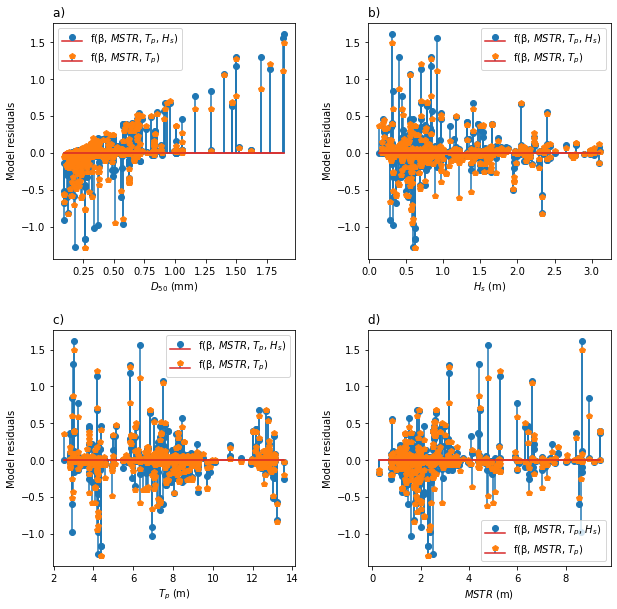

In [427]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(221)
plt.stem(df['d50'], df['d50']-ds_est8,  markerfmt='o', linefmt='-', label=r"f(β, $MSTR$, $T_p$, $H_s$)")
plt.stem(df['d50'], df['d50']-ds_est4,  markerfmt='p', linefmt='-', label = r"f(β, $MSTR$, $T_p$)" )
plt.legend()
plt.ylabel(r'Model residuals')
plt.xlabel(r'$D_{50}$ (mm)')
plt.title(r"a) ", loc='left')

plt.subplot(222)
# plt.stem(dfSEUS['hs_mean'], dfSEUS['d50']-ds_est8, 'ko')
plt.stem(df['hs_mean'], df['d50']-ds_est8,  markerfmt='o', linefmt='-', label=r"f(β, $MSTR$, $T_p$, $H_s$)")
plt.stem(df['hs_mean'], df['d50']-ds_est4,  markerfmt='p', linefmt='-', label = r"f(β, $MSTR$, $T_p$)" )
plt.legend()
plt.ylabel(r'Model residuals')
plt.xlabel(r'$H_s$ (m)')
plt.title(r"b) ", loc='left')

plt.subplot(223)
# plt.stem(dfSEUS['tp'], dfSEUS['d50']-ds_est8, 'ko')
plt.stem(df['tp'], df['d50']-ds_est8,  markerfmt='o', linefmt='-', label=r"f(β, $MSTR$, $T_p$, $H_s$)")
plt.stem(df['tp'], df['d50']-ds_est4,  markerfmt='p', linefmt='-', label = r"f(β, $MSTR$, $T_p$)" )
plt.legend()
plt.ylabel(r'Model residuals')
plt.xlabel(r'$T_p$ (m)')
plt.title(r"c) ", loc='left')

plt.subplot(224)
# plt.stem(dfSEUS['mstr'], dfSEUS['d50']-ds_est8, 'ko')
plt.stem(df['mstr'], df['d50']-ds_est8,  markerfmt='o', linefmt='-', label=r"f(β, $MSTR$, $T_p$, $H_s$)")
plt.stem(df['mstr'], df['d50']-ds_est4,  markerfmt='p', linefmt='-', label = r"f(β, $MSTR$, $T_p$)" )
plt.legend()
plt.ylabel(r'Model residuals')
plt.xlabel(r'$MSTR$ (m)')
plt.title(r"d) ", loc='left')

# plt.savefig('../model_plots/SEUS-wholeOz_d50-model8_residuals-skill.jpg', dpi=300, bbox_inches='tight')


Text(0.57, 0.05, 'Mean error: 40%')

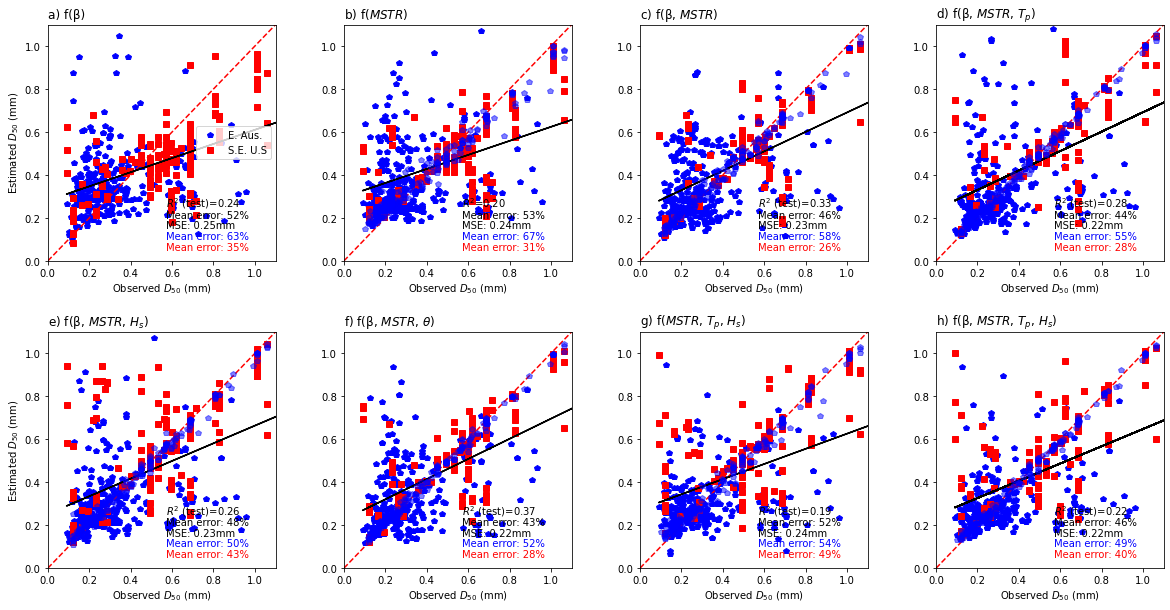

In [428]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

C = np.stack((df['code']))
C_train1, C_test1, _, _ = train_test_split(
    C.T, df['d50'], test_size=test_size, random_state=2022
)

plt.subplot(241)
ds_est = model1.predict(X_test1)
plt.plot(y_test1[C_test1==0], ds_est[C_test1==0], 'bp', label='E. Aus.')
plt.plot(y_test1[C_test1==1], ds_est[C_test1==1], 'rs', label='S.E. U.S')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"a) f(β)", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[0])[:4]))

plt.text(.57,.10, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1[C_test1==0],ds_est[C_test1==0])))[:2]), color='b')
plt.text(.57,.05, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test1[C_test1==1],ds_est[C_test1==1])))[:2]), color='r')
plt.legend(loc=5)

plt.subplot(242)
ds_est = model2.predict(X_test2)
# plt.plot(y_test2, ds_est, 'ko')
plt.plot(y_test2[C_test1==0], ds_est[C_test1==0], 'bp', label='E. Aus.')
plt.plot(y_test2[C_test1==1], ds_est[C_test1==1], 'rs', label='S.E. U.S')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
# plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"b) f($MSTR$)", loc='left')
r2 = np.min(np.corrcoef(y_test2, ds_est))**2
plt.text(.57,.25,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(y_test2, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test2, poly1d_fn(y_test2), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test2,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[1])[:4]))

ds_est2 = model2.predict(X_train2)
plt.plot(y_train2, ds_est2, 'bp', alpha=0.5, label='Train data')

plt.text(.57,.10, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test2[C_test1==0],ds_est[C_test1==0])))[:2]), color='b')
plt.text(.57,.05, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test2[C_test1==1],ds_est[C_test1==1])))[:2]), color='r')


plt.subplot(243)
ds_est = model3.predict(X_test3)
# plt.plot(y_test3, ds_est, 'ko')
plt.plot(y_test3[C_test1==0], ds_est[C_test1==0], 'bp', label='E. Aus.')
plt.plot(y_test3[C_test1==1], ds_est[C_test1==1], 'rs', label='S.E. U.S')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
# plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title("c) f(β, $MSTR$)", loc='left')
r2 = np.min(np.corrcoef(y_test3, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test3, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test3, poly1d_fn(y_test3), '-k')
plt.text(.57,.20, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test3,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[2])[:4]))

ds_est2 = model3.predict(X_train3)
plt.plot(y_train3, ds_est2, 'bp', alpha=0.5, label='Train data')

plt.text(.57,.10, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test3[C_test1==0],ds_est[C_test1==0])))[:2]), color='b')
plt.text(.57,.05, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test3[C_test1==1],ds_est[C_test1==1])))[:2]), color='r')

plt.subplot(244)
ds_est = model4.predict(X_test4)
plt.plot(y_test4[C_test1==0], ds_est[C_test1==0], 'bp', label='E. Aus.')
plt.plot(y_test4[C_test1==1], ds_est[C_test1==1], 'rs', label='S.E. U.S')
# plt.plot(y_test4, ds_est, 'ko')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.title(r"d) f(β, $MSTR$, $T_p$)", loc='left')
r2 = np.min(np.corrcoef(y_test4, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])
plt.text(.57,.2, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test4,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[3])[:4]))

coef = np.polyfit(y_test4, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test4, poly1d_fn(y_test4), '-k')

ds_est2 = model4.predict(X_train4)
plt.plot(y_train4, ds_est2, 'bp', alpha=0.5, label='Train data')

plt.text(.57,.10, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test4[C_test1==0],ds_est[C_test1==0])))[:2]), color='b')
plt.text(.57,.05, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test4[C_test1==1],ds_est[C_test1==1])))[:2]), color='r')


plt.subplot(245)
ds_est = model5.predict(X_test5)
# plt.plot(y_test5, ds_est, 'ko')
plt.plot(y_test5[C_test1==0], ds_est[C_test1==0], 'bp', label='E. Aus.')
plt.plot(y_test5[C_test1==1], ds_est[C_test1==1], 'rs', label='S.E. U.S')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"e) f(β, $MSTR$, $H_s$)", loc='left')
r2 = np.min(np.corrcoef(y_test5, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test5, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test5, poly1d_fn(y_test5), '-k')
plt.text(.57,.2, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test5,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[4])[:4]))

ds_est2 = model5.predict(X_train5)
plt.plot(y_train5, ds_est2, 'bp', alpha=0.5, label='Train data')

plt.text(.57,.10, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test5[C_test1==0],ds_est[C_test1==0])))[:2]), color='b')
plt.text(.57,.05, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test5[C_test1==1],ds_est[C_test1==1])))[:2]), color='r')


plt.subplot(246)
ds_est = model6.predict(X_test6)
# plt.plot(y_test6, ds_est, 'ko')
plt.plot(y_test6[C_test1==0], ds_est[C_test1==0], 'bp', label='E. Aus.')
plt.plot(y_test6[C_test1==1], ds_est[C_test1==1], 'rs', label='S.E. U.S')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
# plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"f) f(β, $MSTR$, $\theta$)", loc='left')
r2 = np.min(np.corrcoef(y_test6, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test6, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test6, poly1d_fn(y_test6), '-k')
plt.text(.57,.2, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test6,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[5])[:4]))

ds_est2 = model6.predict(X_train6)
plt.plot(y_train6, ds_est2, 'bp', alpha=0.5, label='Train data')

plt.text(.57,.10, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test6[C_test1==0],ds_est[C_test1==0])))[:2]), color='b')
plt.text(.57,.05, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test6[C_test1==1],ds_est[C_test1==1])))[:2]), color='r')

plt.subplot(247)
ds_est = model7.predict(X_test7)
# plt.plot(y_test7, ds_est, 'ko')
plt.plot(y_test7[C_test1==0], ds_est[C_test1==0], 'bp', label='E. Aus.')
plt.plot(y_test7[C_test1==1], ds_est[C_test1==1], 'rs', label='S.E. U.S')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
# plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"g) f($MSTR$, $T_p$, $H_s$)", loc='left')
r2 = np.min(np.corrcoef(y_test7, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test7, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test7, poly1d_fn(y_test7), '-k')
plt.text(.57,.2, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test7,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[6])[:4]))

ds_est2 = model7.predict(X_train7)
plt.plot(y_train7, ds_est2, 'bp', alpha=0.5, label='Train data')

plt.text(.57,.10, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test7[C_test1==0],ds_est[C_test1==0])))[:2]), color='b')
plt.text(.57,.05, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test7[C_test1==1],ds_est[C_test1==1])))[:2]), color='r')

plt.subplot(248)
ds_est = model8.predict(X_test8)
# plt.plot(y_test8, ds_est, 'ko')
plt.plot(y_test8[C_test1==0], ds_est[C_test1==0], 'bp', label='E. Aus.')
plt.plot(y_test8[C_test1==1], ds_est[C_test1==1], 'rs', label='S.E. U.S')
plt.xlim(0,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
# plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"h) f(β, $MSTR$, $T_p$, $H_s$)", loc='left')
r2 = np.min(np.corrcoef(y_test8, ds_est))**2
plt.text(.57,.25,r'$R^2$ (test)='+str(r2)[:4])

coef = np.polyfit(y_test8, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test8, poly1d_fn(y_test8), '-k')
plt.text(.57,.2, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test8,ds_est)))[:2]))
plt.text(.57,.15, r'MSE: {}mm'.format(str(Smean[7])[:4]))

ds_est2 = model8.predict(X_train8)
plt.plot(y_train8, ds_est2, 'bp', alpha=0.5, label='Train data')

plt.text(.57,.10, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test8[C_test1==0],ds_est[C_test1==0])))[:2]), color='b')
plt.text(.57,.05, r'Mean error: {}%'.format(str(np.mean(prc_err(y_test8[C_test1==1],ds_est[C_test1==1])))[:2]), color='r')

# plt.savefig('../model_plots/SEUS-wholeOz_d50-8models-skill-2regions.jpg', dpi=300, bbox_inches='tight')


In [429]:
mm = df['d50'].mean()

C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)
C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)
C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)
C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)
C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\sklearn\utils\deprecation

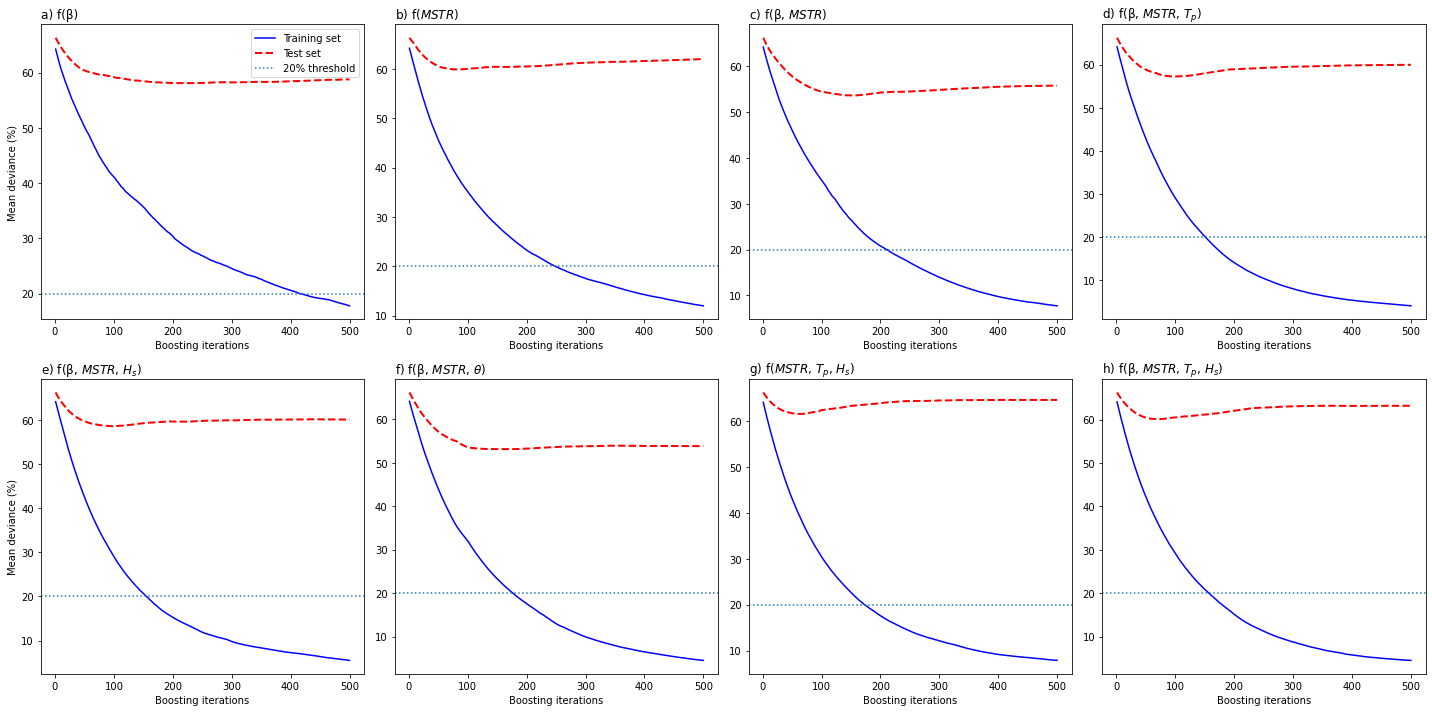

In [430]:
fig=plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

####################
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred1 in enumerate(model1.staged_predict(X_test1)):
    test_score[i] = model1.loss_(y_test1, y_pred1)

plt.subplot(2, 4, 1)
plt.title(r"a) f(β)", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    100*(np.sqrt(model1.train_score_)/mm),
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, 100*(np.sqrt(test_score)/mm), "r--", label="Test set", lw=2
)
plt.axhline(20, linestyle=':',label='20% threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Mean deviance (%)")
# plt.ylim(0,45)
plt.legend(loc=0)

###########################
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred2 in enumerate(model2.staged_predict(X_test2)):
    test_score[i] = model2.loss_(y_test2, y_pred2)

plt.subplot(2,4, 2)
plt.title(r"b) f($MSTR$)", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    100*(np.sqrt(model2.train_score_)/mm),
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, 100*(np.sqrt(test_score)/mm), "r--", label="Test set", lw=2
)
plt.axhline(20, linestyle=':',label='20% threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
# plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,45)

#############################
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred3 in enumerate(model3.staged_predict(X_test3)):
    test_score[i] = model3.loss_(y_test3, y_pred3)

plt.subplot(2,4, 3)
plt.title("c) f(β, $MSTR$)", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    100*(np.sqrt(model3.train_score_)/mm),
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, 100*(np.sqrt(test_score)/mm), "r--", label="Test set", lw=2
)
plt.axhline(20, linestyle=':',label='20% threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
# plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,45)

#####################
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred4 in enumerate(model4.staged_predict(X_test4)):
    test_score[i] = model4.loss_(y_test4, y_pred4)
    
plt.subplot(2, 4, 4)
plt.title(r"d) f(β, $MSTR$, $T_p$) ", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    100*(np.sqrt(model4.train_score_)/mm),
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, 100*(np.sqrt(test_score)/mm), "r--", label="Test set", lw=2
)
plt.axhline(20, linestyle=':',label='20% threshold')
plt.xlabel("Boosting iterations")
# plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,45)

#####################
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred5 in enumerate(model5.staged_predict(X_test5)):
    test_score[i] = model5.loss_(y_test5, y_pred5)
    
plt.subplot(2,4, 5)
plt.title(r"e) f(β, $MSTR$, $H_s$) ", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    100*(np.sqrt(model5.train_score_)/mm),
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, 100*(np.sqrt(test_score)/mm), "r--", label="Test set", lw=2
)
plt.axhline(20, linestyle=':',label='20% threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
plt.ylabel("Mean deviance (%)")
# plt.ylim(0,45)

#####################
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred6 in enumerate(model6.staged_predict(X_test6)):
    test_score[i] = model6.loss_(y_test6, y_pred6)
    
plt.subplot(2, 4, 6)
plt.title(r"f) f(β, $MSTR$, $\theta$) ", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    100*(np.sqrt(model6.train_score_)/mm),
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, 100*(np.sqrt(test_score)/mm), "r--", label="Test set", lw=2
)
plt.axhline(20, linestyle=':',label='20% threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
# plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,45)

#####################
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred7 in enumerate(model7.staged_predict(X_test7)):
    test_score[i] = model7.loss_(y_test7, y_pred7)
    
plt.subplot(2, 4, 7)
plt.title(r"g) f($MSTR$, $T_p$, $H_s$) ", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    100*(np.sqrt(model7.train_score_)/mm),
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, 100*(np.sqrt(test_score)/mm), "r--", label="Test set", lw=2
)
plt.axhline(20, linestyle=':',label='20% threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
# plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,45)

#####################
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred8 in enumerate(model8.staged_predict(X_test8)):
    test_score[i] = model8.loss_(y_test8, y_pred8)
    
plt.subplot(2, 4, 8)
plt.title(r"h) f(β, $MSTR$, $T_p$, $H_s$) ", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    100*(np.sqrt(model8.train_score_)/mm),
    "b-",
    label="Training set",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, 100*(np.sqrt(test_score)/mm), "r--", label="Test set", lw=2
)
plt.axhline(20, linestyle=':',label='20% threshold')
# plt.legend(loc="upper right")
plt.xlabel("Boosting iterations")
# plt.ylabel("Deviance (non-dim.)")
# plt.ylim(0,45)

fig.tight_layout()

# plt.savefig('../model_plots/SEUS-wholeOz_d50-8models-training-strat-lat.jpg', dpi=300, bbox_inches='tight')

Text(0.0, 1.0, 'j) ')

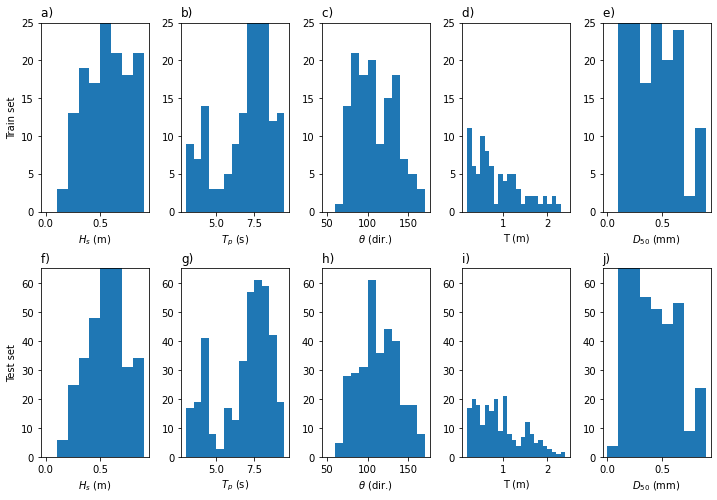

In [431]:
testlim = 65
trainlim = 25

fig = plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)


plt.subplot(2,5,1)
plt.hist(X_train5[:,2], bins=np.arange(0,1,.1))
plt.ylim(0,trainlim); plt.ylabel('Train set'); plt.xlabel(r'$H_s$ (m)')
plt.title(r'a) ', loc='left')

plt.subplot(2,5,2)
plt.hist(X_train4[:,2], bins=np.arange(3,10,.5))
plt.ylim(0,trainlim); plt.xlabel(r'$T_p$ (s)')
plt.title(r'b)', loc='left')

plt.subplot(2,5,3)
plt.hist(X_train6[:,2], bins=np.arange(50,180,10))
plt.ylim(0,trainlim); plt.xlabel(r'$\theta$ (dir.)')
plt.title(r'c) ', loc='left')

plt.subplot(2,5,4)
plt.hist(X_train4[:,3], bins=np.arange(0.2,2.5,.1))
plt.ylim(0,trainlim); plt.xlabel('T (m)')
plt.title(r'd) ', loc='left')

plt.subplot(2,5,5)
plt.hist(y_train4, bins=np.arange(0,1,.1))
plt.ylim(0,trainlim); plt.xlabel(r'$D_{50}$ (mm)')
plt.title(r'e) ', loc='left')

plt.subplot(2,5,6)
plt.hist(X_test5[:,2], bins=np.arange(0,1,.1))
plt.ylim(0,testlim); plt.ylabel('Test set'); plt.xlabel(r'$H_s$ (m)')
plt.title(r'f) ', loc='left')

plt.subplot(2,5,7)
plt.hist(X_test4[:,2], bins=np.arange(3,10,.5))
plt.ylim(0,testlim); plt.xlabel(r'$T_p$ (s)')
plt.title(r'g)', loc='left')

plt.subplot(2,5,8)
plt.hist(X_test6[:,2], bins=np.arange(50,180,10))
plt.ylim(0,testlim); plt.xlabel(r'$\theta$ (dir.)')
plt.title(r'h) ', loc='left')

plt.subplot(2,5,9)
plt.hist(X_test4[:,3], bins=np.arange(0.2,2.5,.1))
plt.ylim(0,testlim); plt.xlabel('T (m)')
plt.title(r'i) ', loc='left')

plt.subplot(2,5,10)
plt.hist(y_test4, bins=np.arange(0,1,.1))
plt.ylim(0,testlim); plt.xlabel('$D_{50}$ (mm)')
plt.title(r'j) ', loc='left')

# plt.savefig('../data_plots/SEUS-wholeOz_d50-test_train_dists.jpg', dpi=300, bbox_inches='tight')

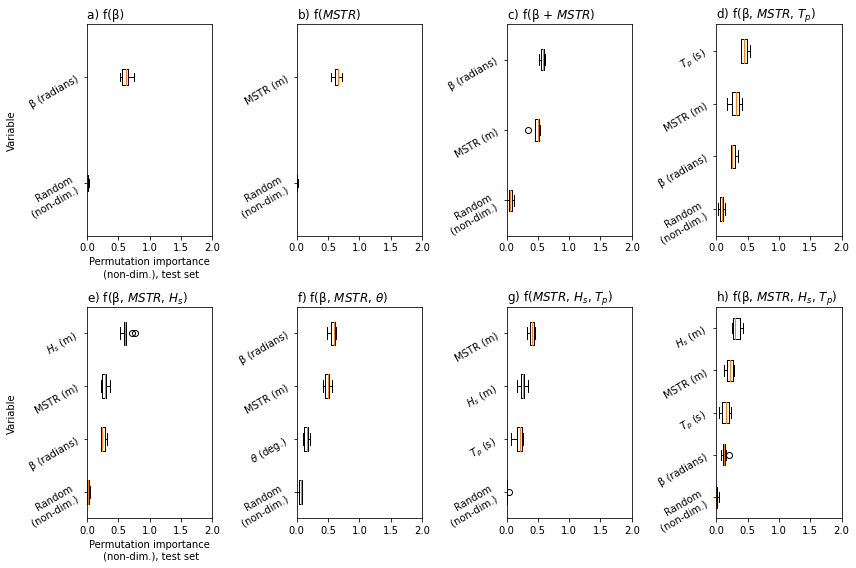

In [432]:

fig=plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

########################
result = permutation_importance(
    model1, X_test1, y_test1, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
ax=plt.subplot(241)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(feature_names1)[sorted_idx],
)

plt.xlim(0,2)
plt.title("a) f(β) ", loc='left')
plt.xlabel("Permutation importance\n (non-dim.), test set")
plt.ylabel("Variable")
plt.setp(ax.get_yticklabels (), rotation=30)

#########################
result = permutation_importance(
    model2, X_test2, y_test2, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
ax=plt.subplot(242)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(feature_names2)[sorted_idx],
)

plt.xlim(0,2)
plt.title("b) f($MSTR$) ", loc='left')
# plt.xlabel("Permutation importance (non-dim.), test set")
# plt.ylabel("Variable")
plt.setp(ax.get_yticklabels (), rotation=30)

#############################
result = permutation_importance(
    model3, X_test3, y_test3, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
ax=plt.subplot(243)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(feature_names3)[sorted_idx],
)

plt.xlim(0,2)
plt.title("c) f(β + $MSTR$) ", loc='left')
# plt.xlabel("Permutation importance (non-dim.), test set")
# plt.ylabel("Variable")
plt.setp(ax.get_yticklabels (), rotation=30)

############################
result = permutation_importance(
    model4, X_test4, y_test4, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
ax=plt.subplot(244)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(feature_names4)[sorted_idx],
)
plt.xlim(0,2)
plt.title(r"d) f(β, $MSTR$, $T_p$)", loc='left')
# plt.xlabel("Permutation importance (non-dim.), test set")
# plt.ylabel("Variable")
plt.setp(ax.get_yticklabels (), rotation=30)

############################
result = permutation_importance(
    model5, X_test5, y_test5, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
ax=plt.subplot(245)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(feature_names5)[sorted_idx],
)
plt.xlim(0,2)
plt.title(r"e) f(β, $MSTR$, $H_s$)", loc='left')
plt.xlabel("Permutation importance\n (non-dim.), test set")
plt.ylabel("Variable")
plt.setp(ax.get_yticklabels (), rotation=30)

##################################
result = permutation_importance(
    model6, X_test6, y_test6, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
ax=plt.subplot(246)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(feature_names6)[sorted_idx],
)
plt.xlim(0,2)
plt.title(r"f) f(β, $MSTR$, $\theta$)", loc='left')
# plt.xlabel("Permutation importance (non-dim.), test set")
# plt.ylabel("Variable")
plt.setp(ax.get_yticklabels (), rotation=30)

##################################
result = permutation_importance(
    model7, X_test7, y_test7, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
ax=plt.subplot(247)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(feature_names7)[sorted_idx],
)
plt.xlim(0,2)
plt.title(r"g) f($MSTR$, $H_s$, $T_p$)", loc='left')
# plt.xlabel("Permutation importance (non-dim.), test set")
# plt.ylabel("Variable")
plt.setp(ax.get_yticklabels (), rotation=30)

##################################
result = permutation_importance(
    model8, X_test8, y_test8, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
ax=plt.subplot(248)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(feature_names8)[sorted_idx],
)
plt.setp(ax.get_yticklabels (), rotation=30)
plt.xlim(0,2)
plt.title(r"h) f(β, $MSTR$, $H_s$, $T_p$)", loc='left')
# plt.xlabel("Permutation importance (non-dim.), test set")
# plt.ylabel("Variable")

fig.tight_layout()
# plt.savefig('../model_plots/SEUS-wholeOz_d50-8models-featimps.jpg', dpi=300, bbox_inches='tight')
